<a href="https://colab.research.google.com/github/ryghrmni/DeepLifeProject/blob/robin/DeepLife_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arvinjmf","key":"ef5b6cf0cf0beed53111482fa9d45430"}'}

In [5]:
ls

drive/  kaggle.json  sample_data/


In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
 ! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          18850        412  1.0              
ashishkumarak/netflix-reviews-playstore-daily-updated           Netflix Reviews [DAILY UPDATED]                   12MB  2024-05-15 23:27:44           1068         31  1.0              
sahirmaharajj/school-student-daily-attendance                   School Student Daily Attendance                    2MB  2024-04-29 19:29:56           4459         93  1.0              
sahirmaharajj/college-exam-results-sat                          College Exa

In [10]:
! kaggle competitions download -c data-science-bowl-2018

 96% 345M/358M [00:05<00:00, 17.8MB/s]
100% 358M/358M [00:05<00:00, 65.2MB/s]


In [11]:
! mkdir data

In [12]:
! unzip data-science-bowl-2018.zip -d data

Archive:  data-science-bowl-2018.zip
  inflating: data/stage1_sample_submission.csv.zip  
  inflating: data/stage1_solution.csv.zip  
  inflating: data/stage1_test.zip    
  inflating: data/stage1_train.zip   
  inflating: data/stage1_train_labels.csv.zip  
  inflating: data/stage2_sample_submission_final.csv.zip  
  inflating: data/stage2_test_final.zip  


In [13]:
cd data

/content/data


In [14]:
!for file in *.zip; do unzip -q "$file" -d "${file%%.*}" && rm "$file"; done

In [15]:
ls

stage1_sample_submission/  stage1_test/   stage1_train_labels/             stage2_test_final/
stage1_solution/           stage1_train/  stage2_sample_submission_final/


In [16]:
import os
import shutil
import random

# Define the source directory
source_dir = "stage1_train/"

# Define the destination directory
dest_dir = "toy_data/"

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Get a list of all folders in the source directory
folders = os.listdir(source_dir)

# Randomly select 50 folders
selected_folders = random.sample(folders, 50)

# Copy selected folders to the destination directory
for folder in selected_folders:
    src = os.path.join(source_dir, folder)
    dst = os.path.join(dest_dir, folder)
    shutil.copytree(src, dst)

print("Selected folders have been copied to the 'toy_data' folder.")


Selected folders have been copied to the 'toy_data' folder.


In [17]:
cd toy_data/

/content/data/toy_data


In [18]:
ls

003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/
0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37/
0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1/
13c8ff1f49886e91c98ce795c93648ad8634c782ff57eb928ce29496b0425057/
2246874c8b5ba218d01ad8153a201ad4660195f3e4c65da6b9d4ccaf82cb7edf/
30f65741053db713b3f328d31d3234b6fedbe31df65c1a8ea29be28146cab789/
3594684b9ea0e16196f498815508f8d364d55fea2933a2e782122b6f00375d04/
37ed50eea5a1e0bade3e6753793b6caeb061cd4c2f365658c257f69cab1f6288/
3bfd6bb152310f93daa6f4e1867c10572946e874b3a30c9ba8e0fcdeb590300b/
4185b9369fc8bdcc7e7c68f2129b9a7442237cd0f836a4b6d13ef64bf0ef572a/
4590d7d47f521df62f3bcb0bf74d1bca861d94ade614d8afc912d1009d607b94/
4829177d0b36abdd92c4ef0c7834cbc49f95232076bdd7e828f1f7cbb5ed80ec/
49edc2f7715100fb0390916e52b3fd11a921f02e59509dc987f67840a36250fc/
4c032609d377bd980e01f888e0b298600bf8af0e33c4271a1f3aaf76964dce06/
53ad09e4348767bece0165884bf40c10b72ae18444e3f414a850442f02385efc/
54cb3328e7

In [43]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def stretch_contrast(image):
    """
    Stretch the contrast of an image to utilize the full range of pixel values (0 to 255).

    Args:
    - image (numpy array): Input image represented as a numpy array.

    Returns:
    - stretched_image (numpy array): Image with contrast stretched to utilize the full range of pixel values.
    """
    # Compute the minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Stretch the contrast using linear scaling
    stretched_image = (image - min_val) * (255.0 / (max_val - min_val))
    return stretched_image.astype(np.uint8)

def load_data(base_path):
    images = []
    masks = []
    sample_names = []

    sample_folders = [os.path.join(base_path, folder) for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

    for sample_folder in sample_folders:
        sample_name = os.path.basename(sample_folder)
        image_path = os.path.join(sample_folder, 'images', f'{sample_name}.png')
        masks_path = os.path.join(sample_folder, 'masks')

        # Load the image and stretch contrast
        image = Image.open(image_path)
        image = np.array(image)
        stretched_image = stretch_contrast(image)
        images.append(stretched_image)
        sample_names.append(sample_name)

        # Load all masks for this sample
        mask_files = [os.path.join(masks_path, mask_file) for mask_file in os.listdir(masks_path) if mask_file.endswith('.png')]
        sample_masks = [np.array(Image.open(mask_file).convert('L')) for mask_file in mask_files]
        masks.append(sample_masks)

    return images, masks, sample_names



First sample name: 7f38885521586fc6011bef1314a9fb2aa1e4935bd581b2991e1d963395eab770


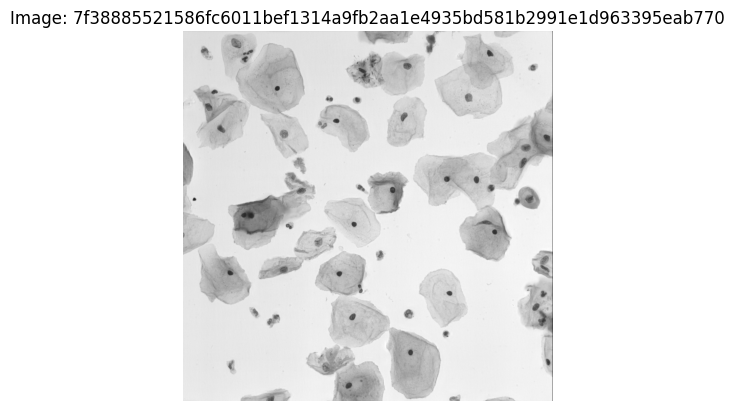

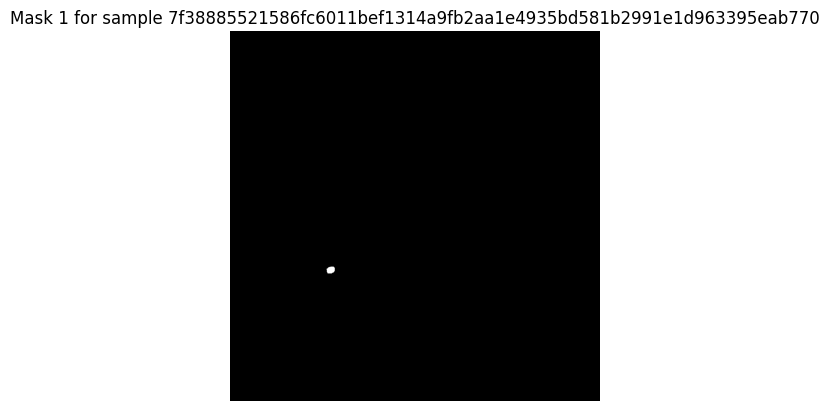

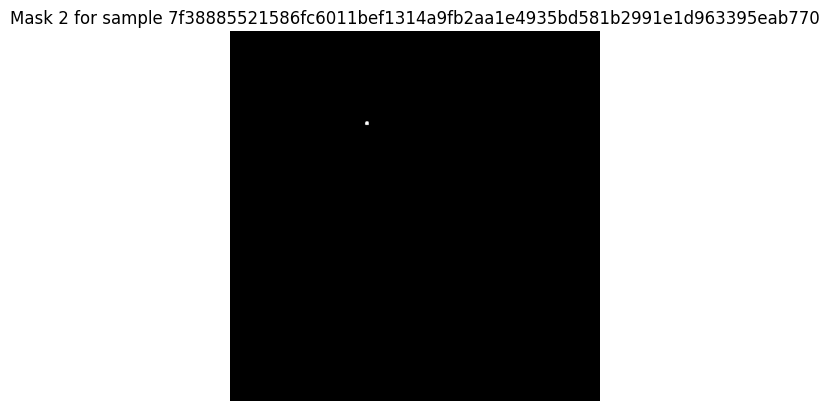

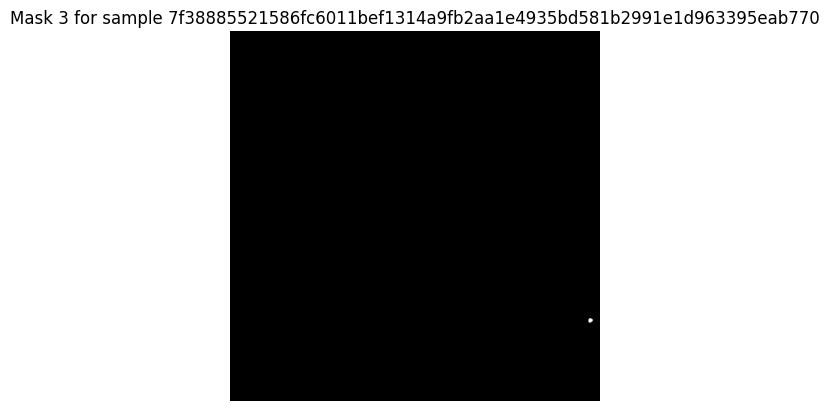

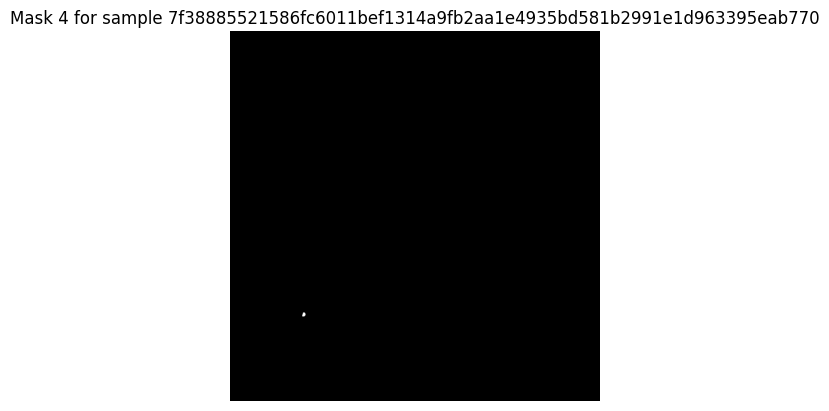

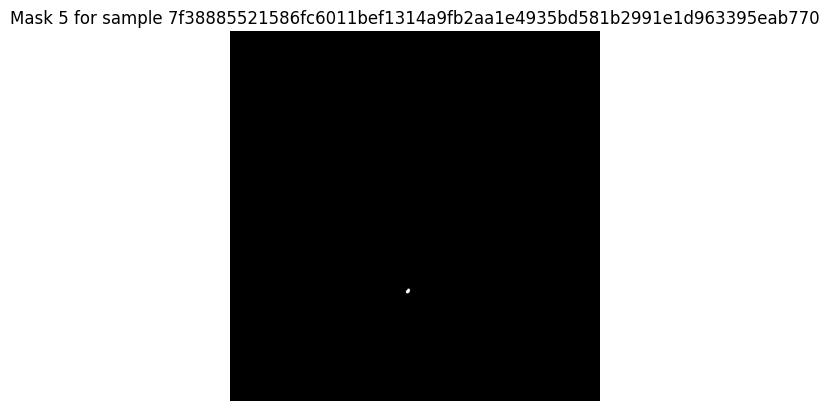

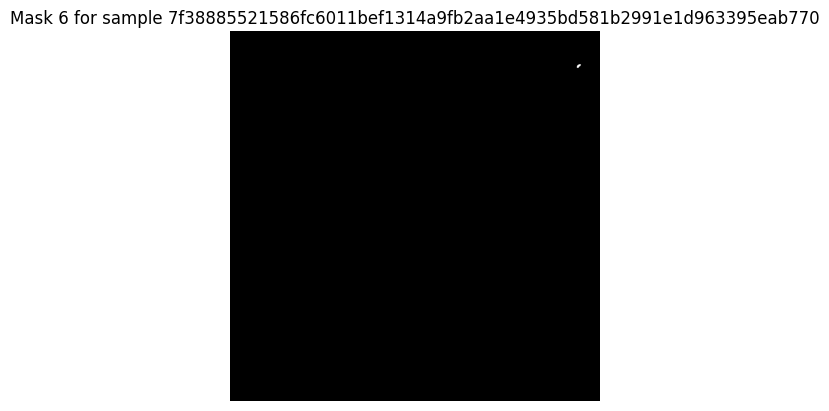

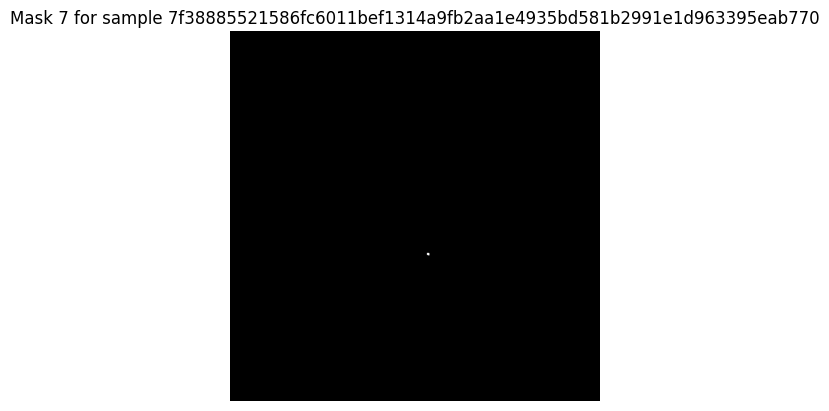

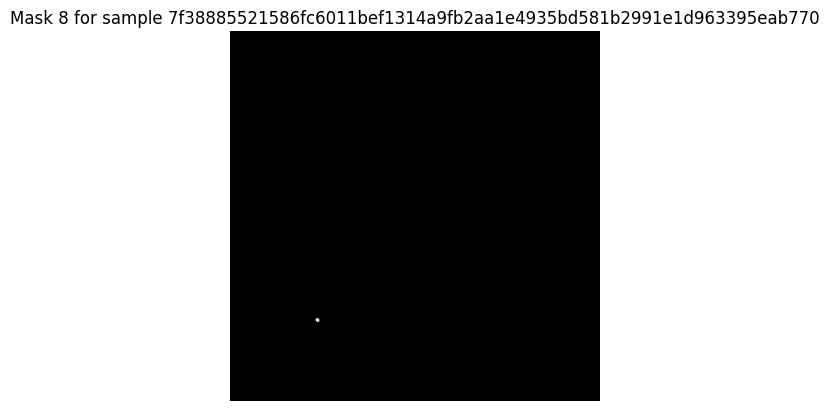

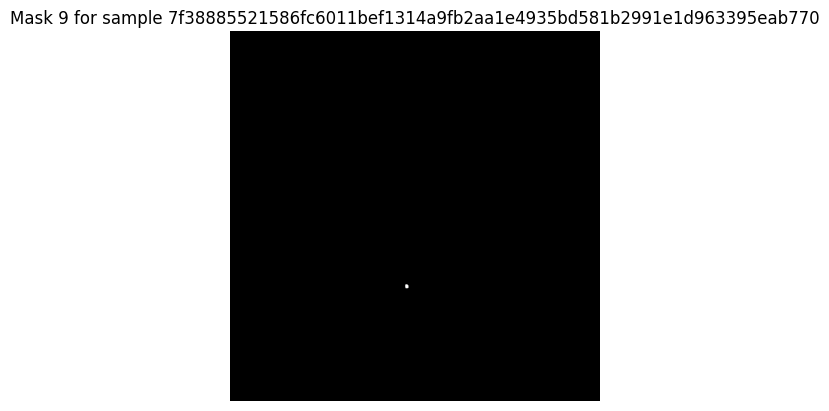

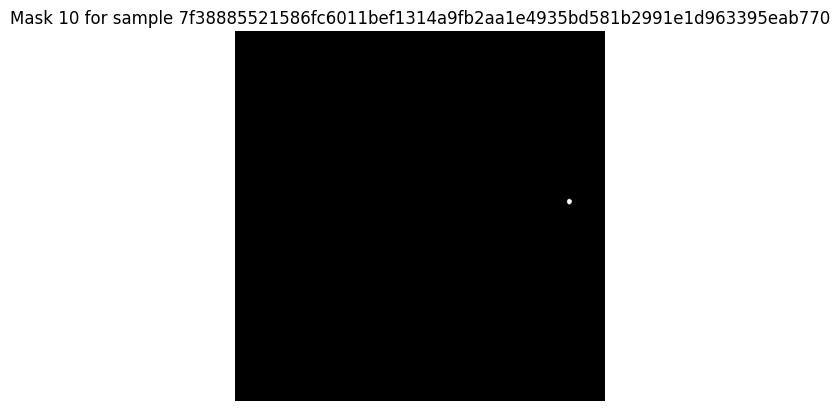

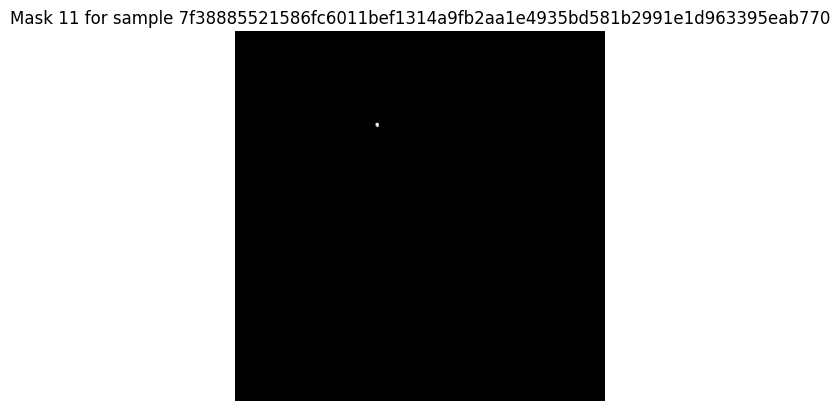

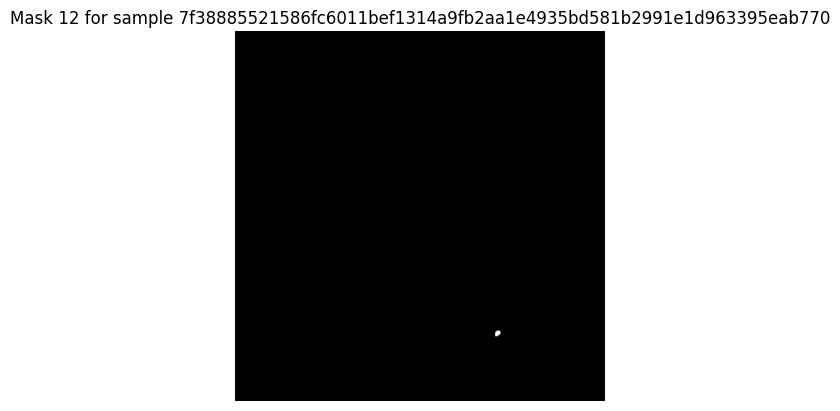

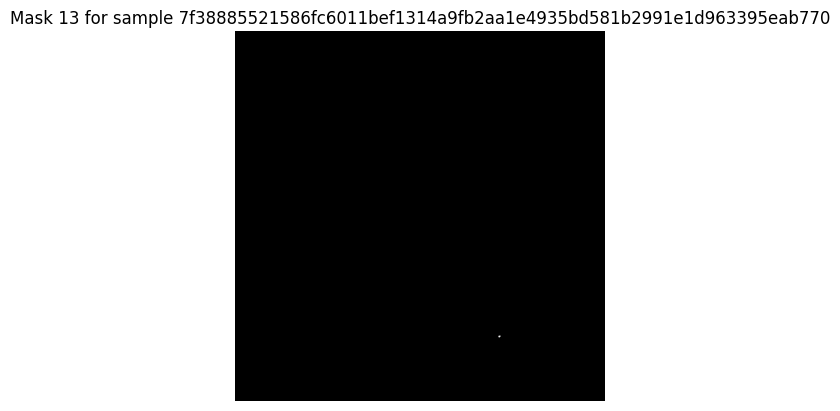

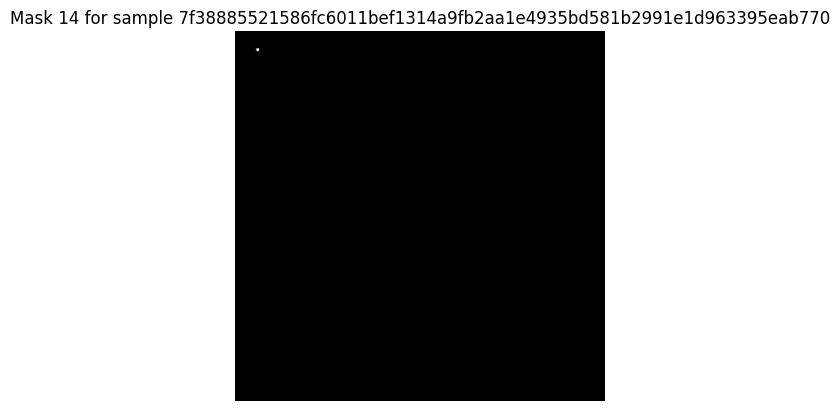

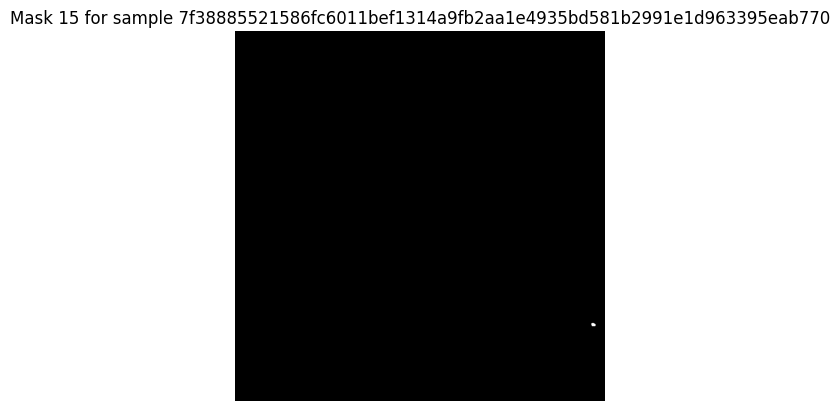

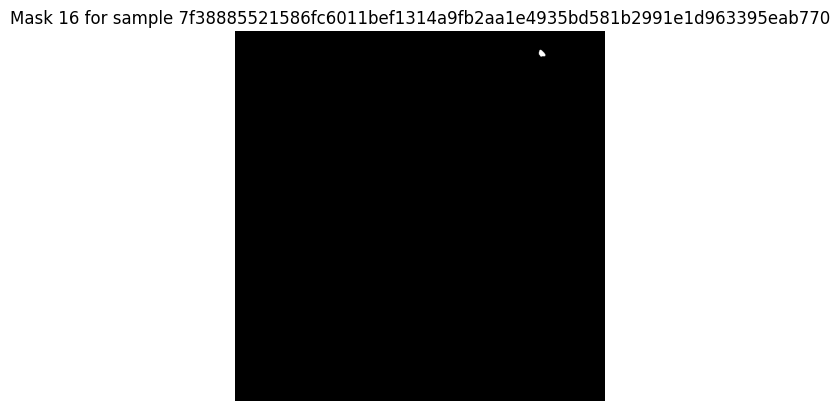

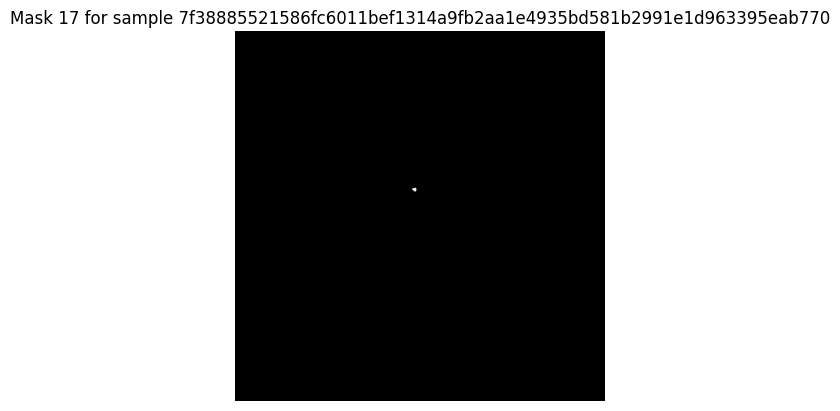

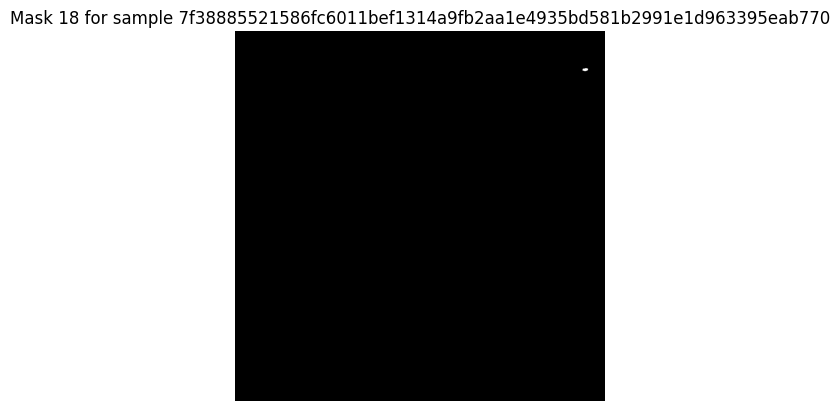

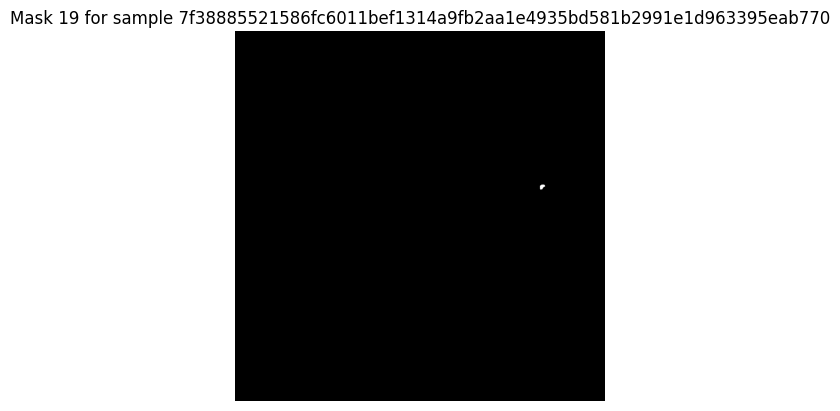

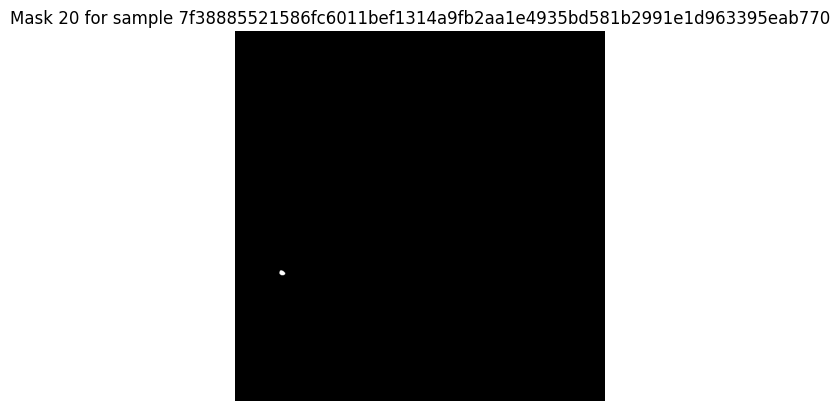

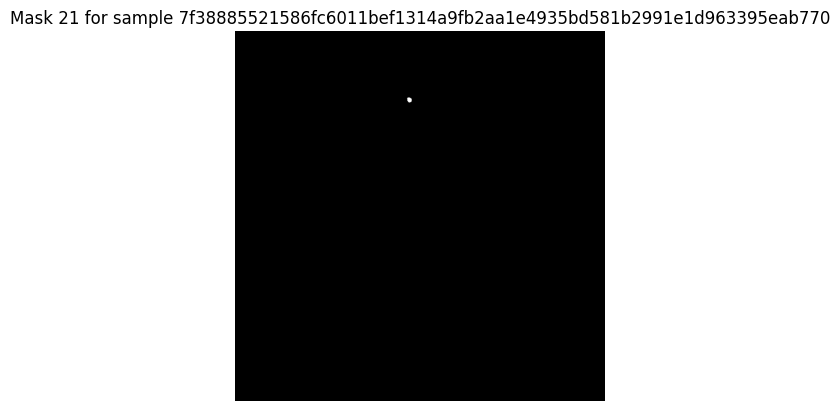

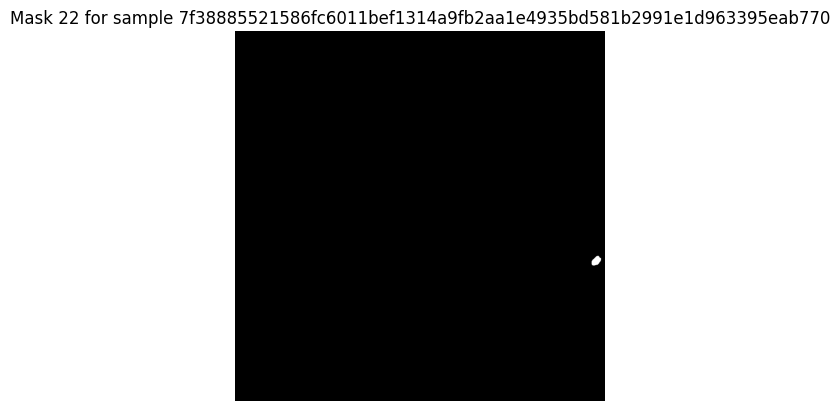

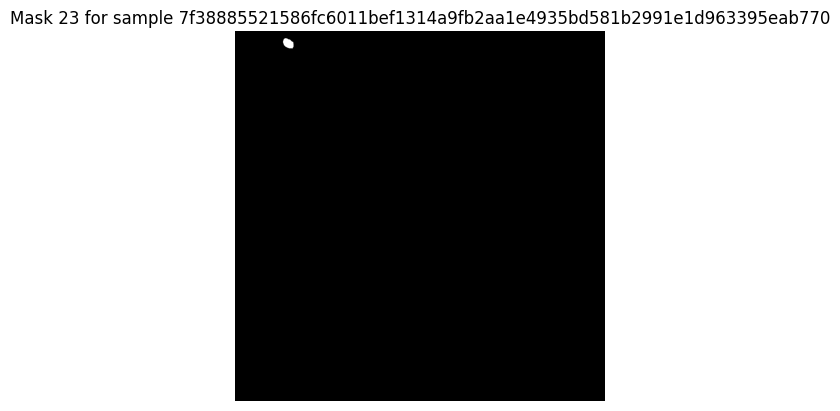

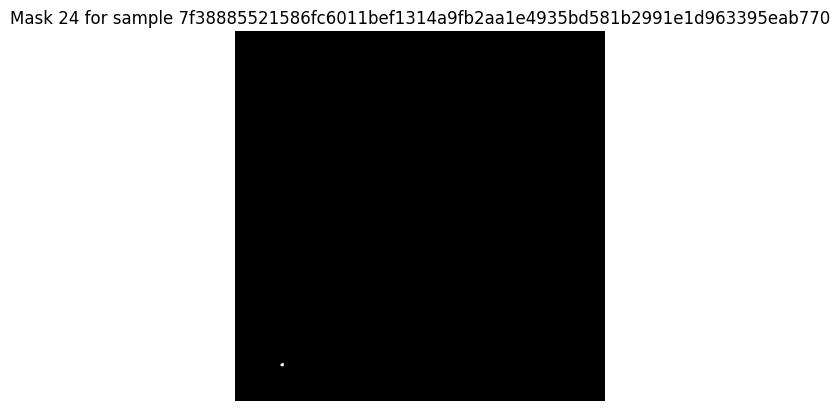

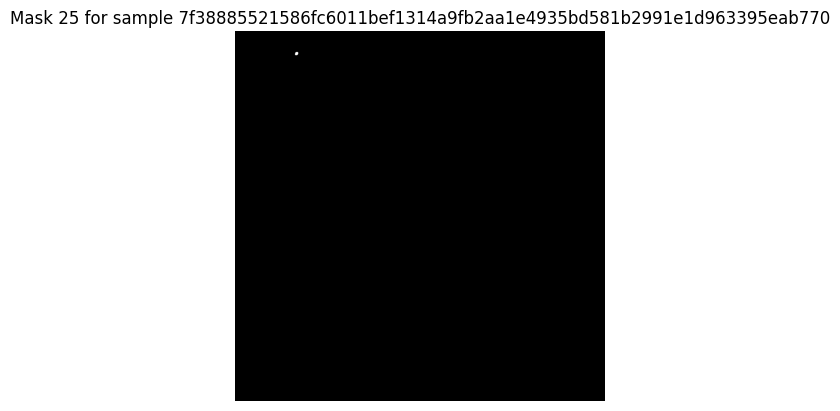

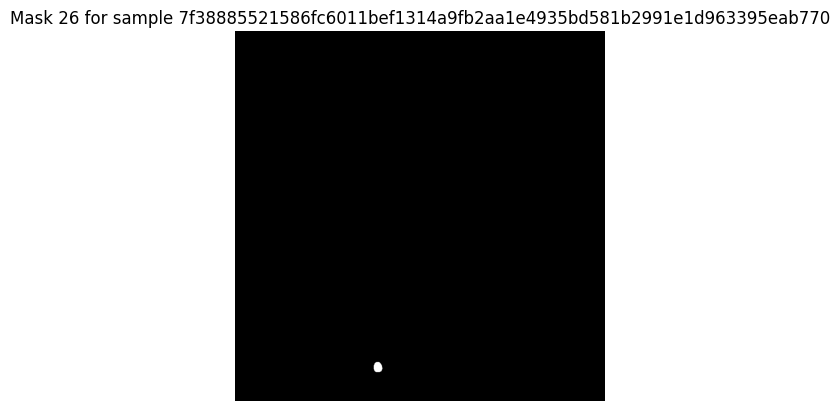

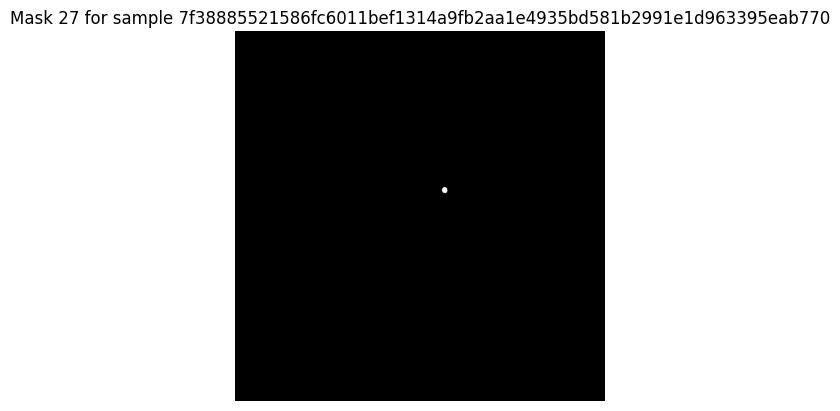

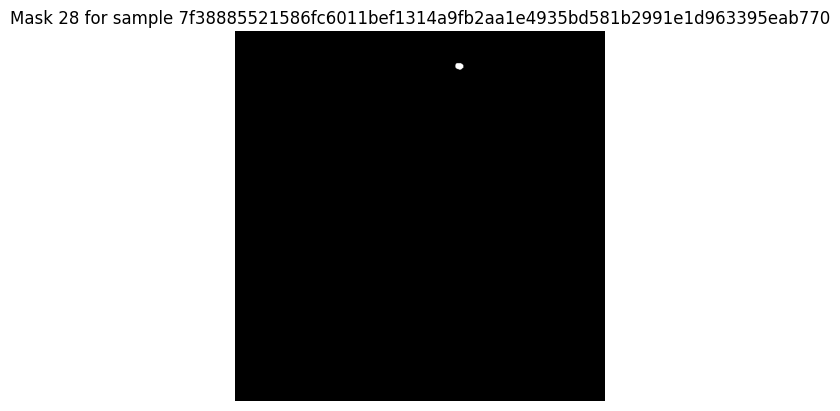

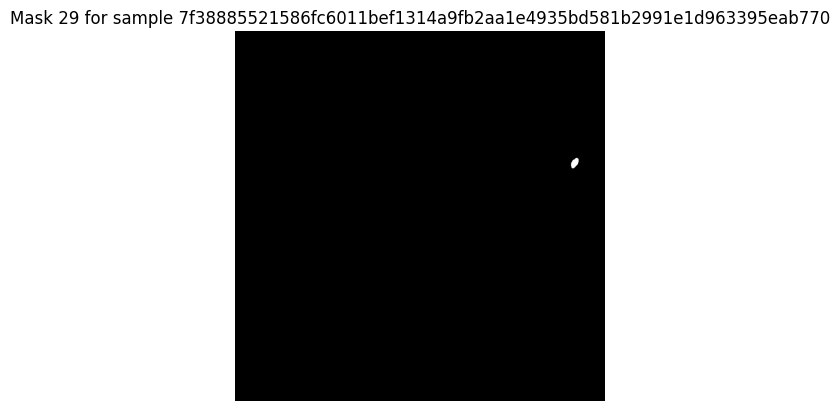

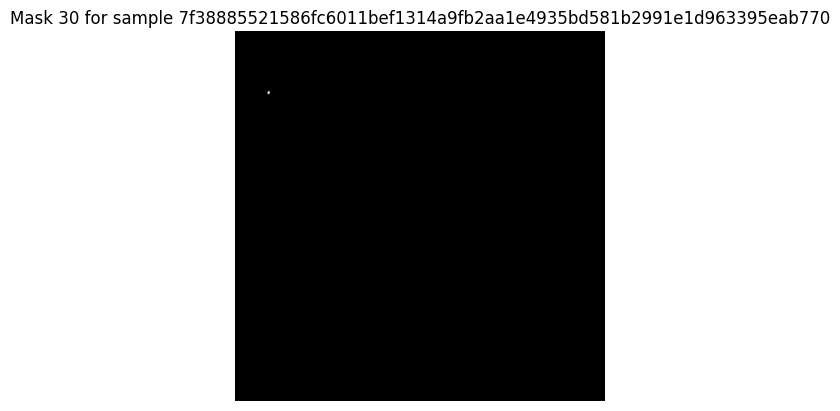

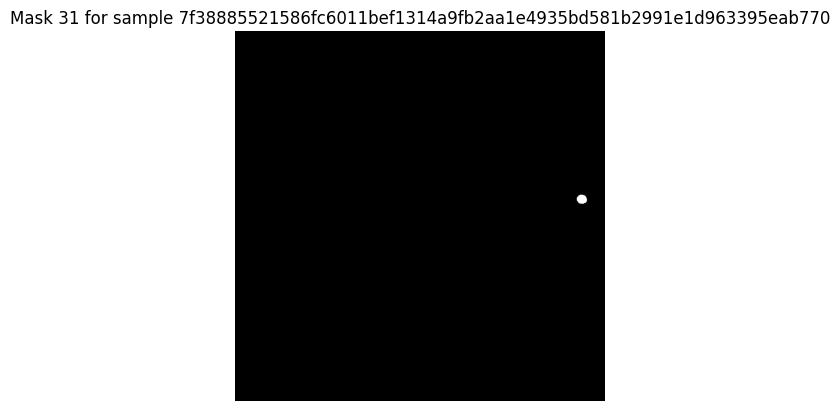

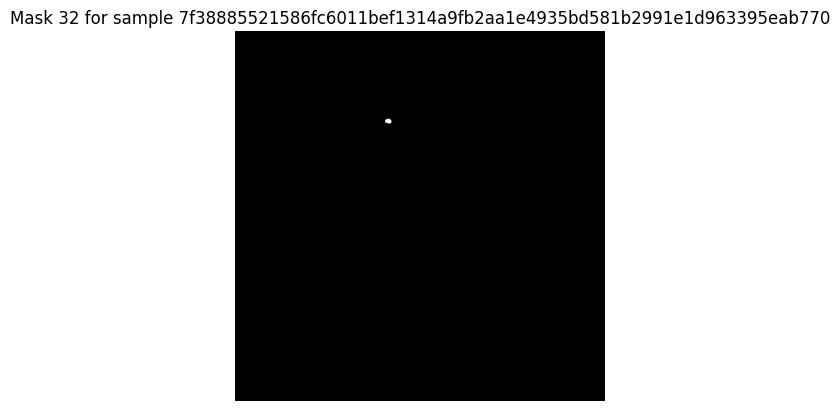

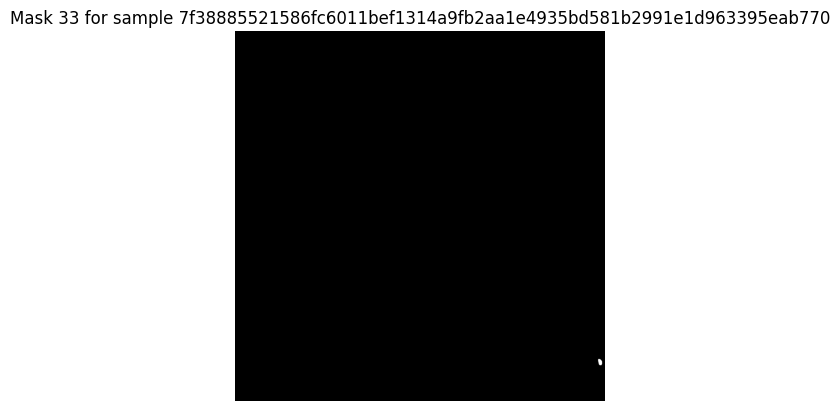

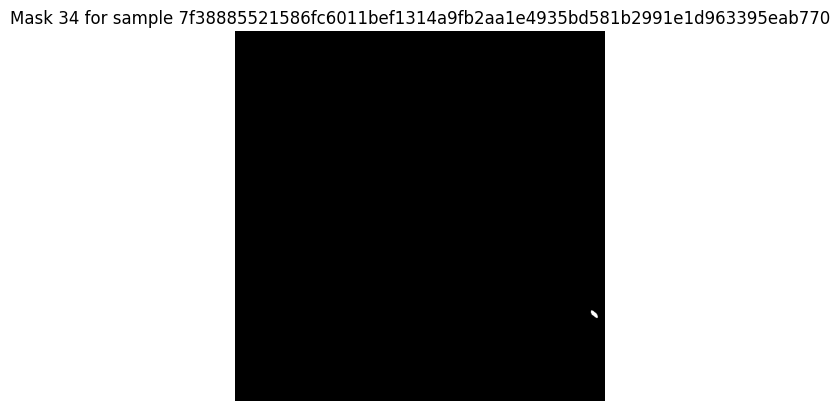

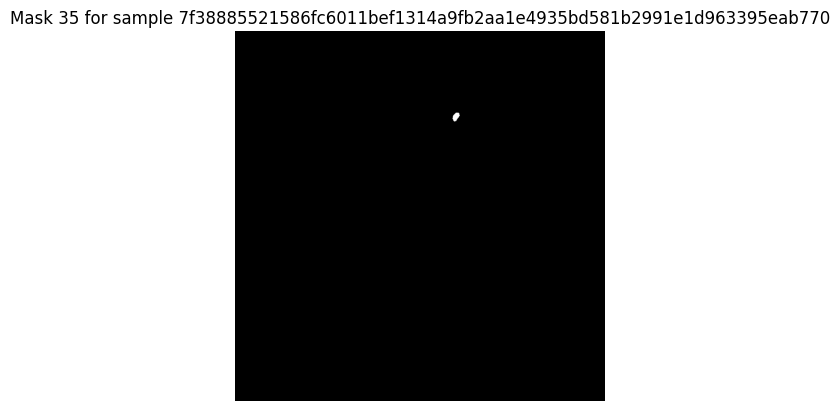

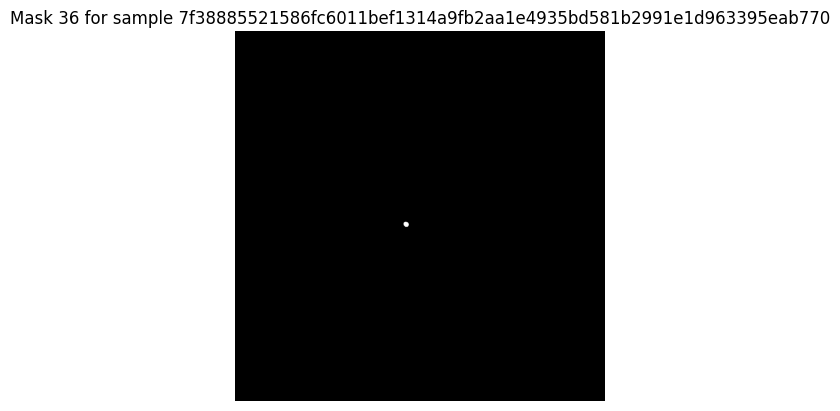

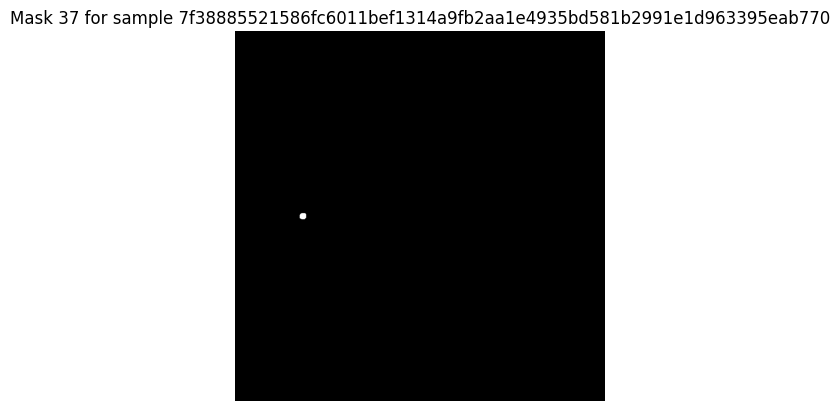

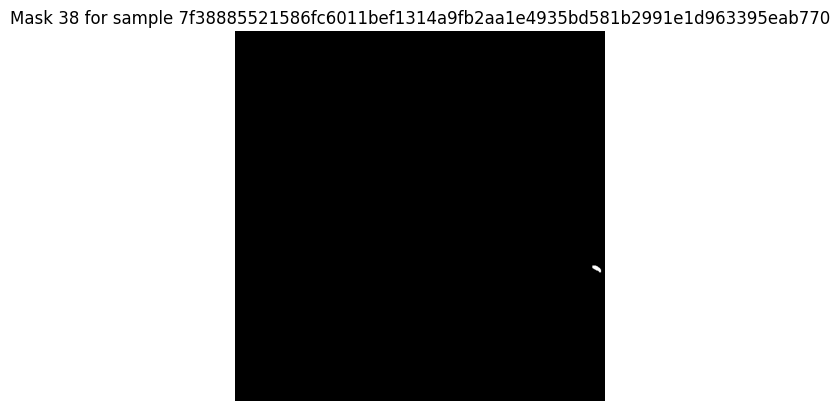

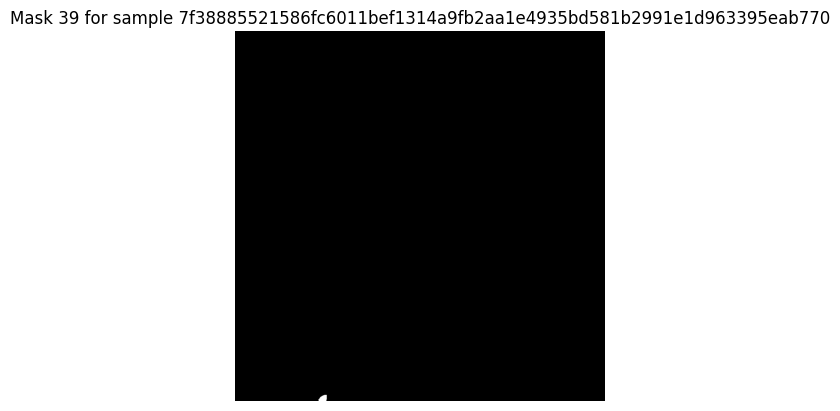

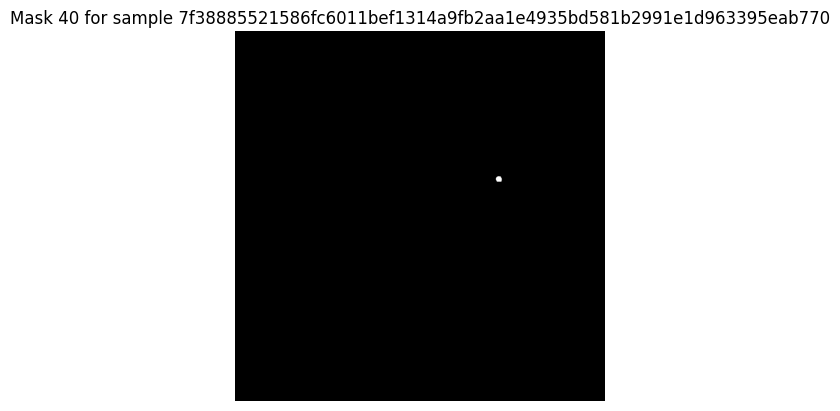

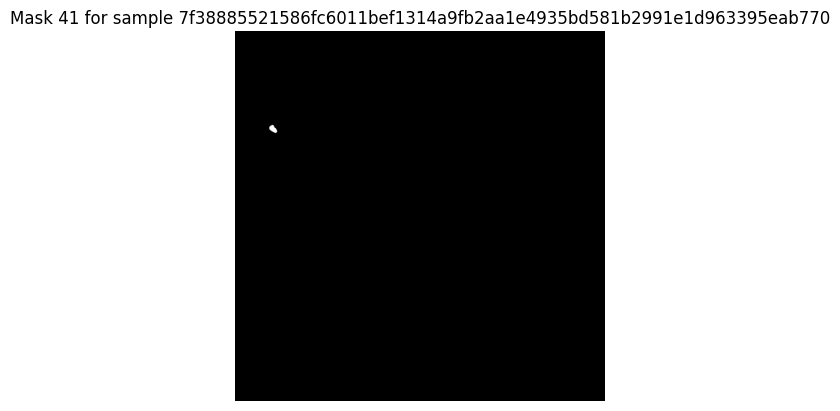

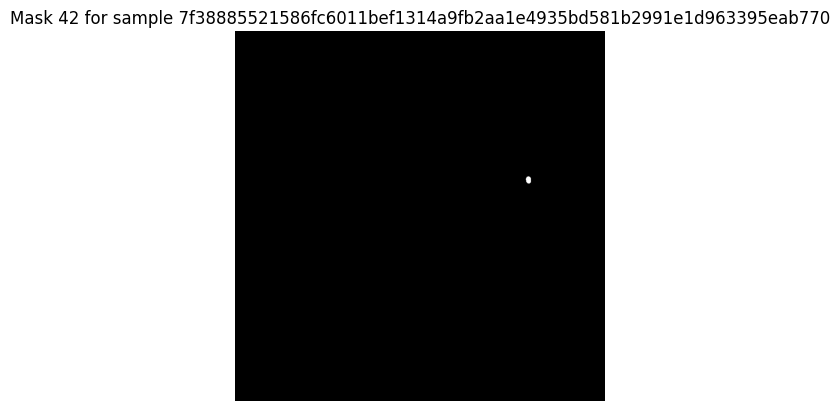

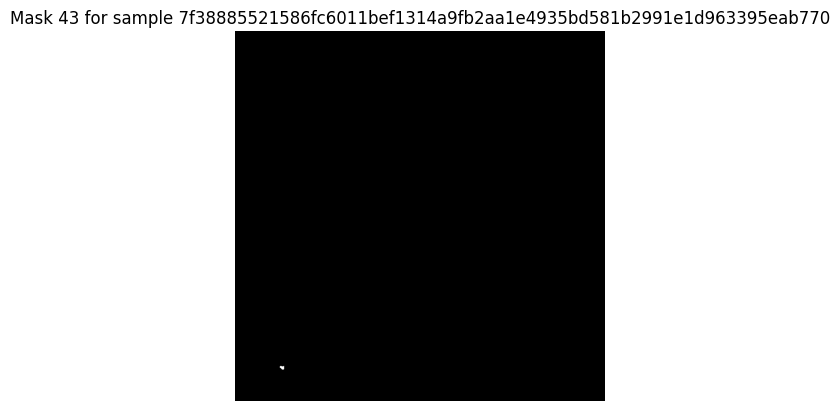

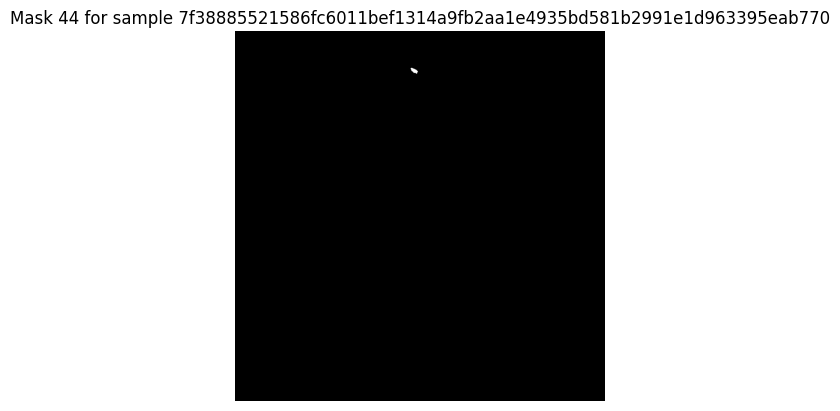

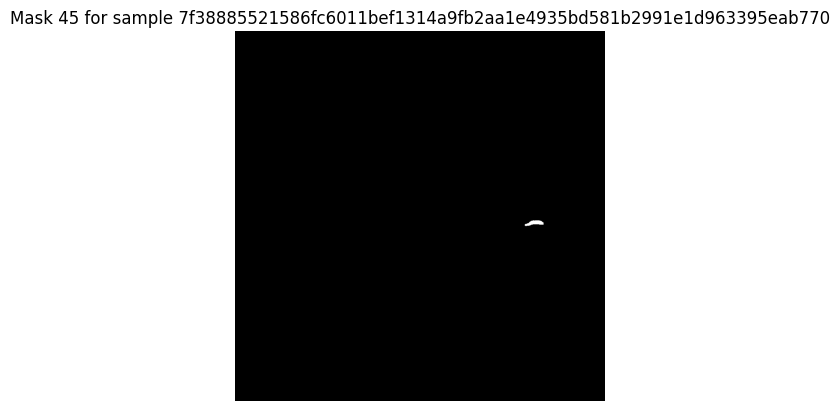

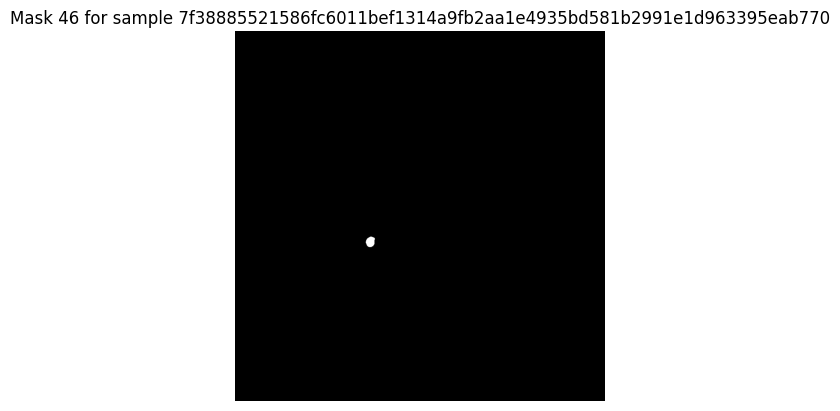

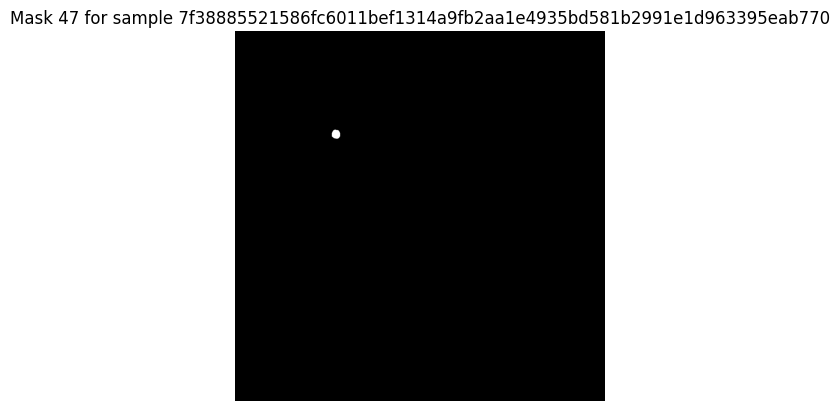

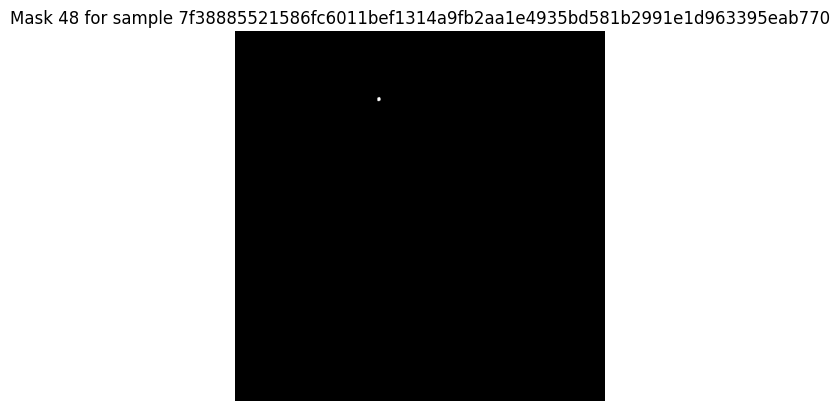

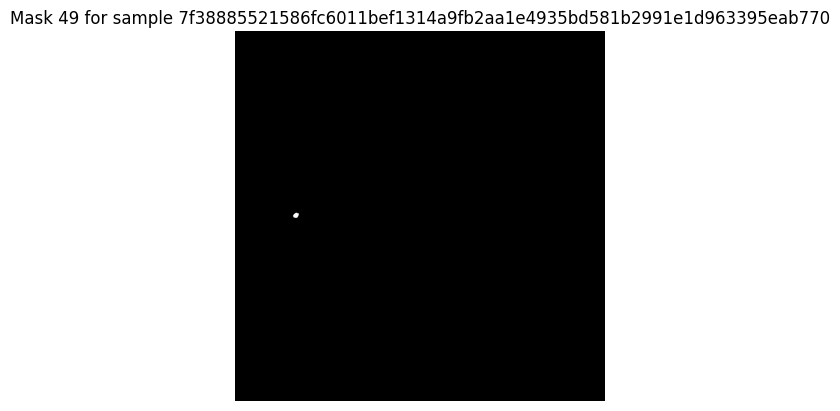

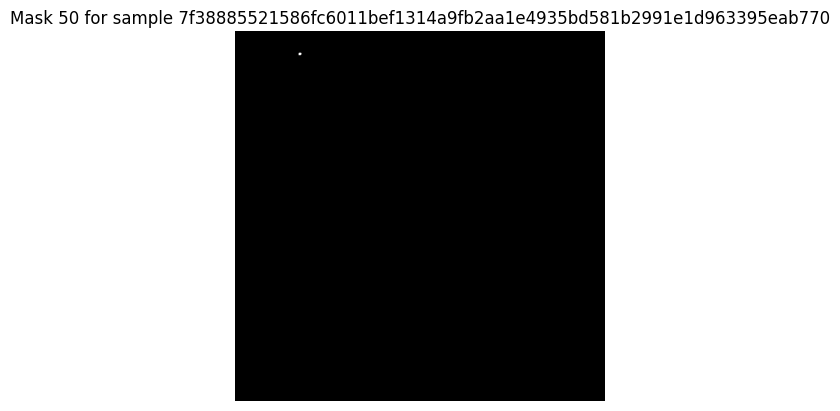

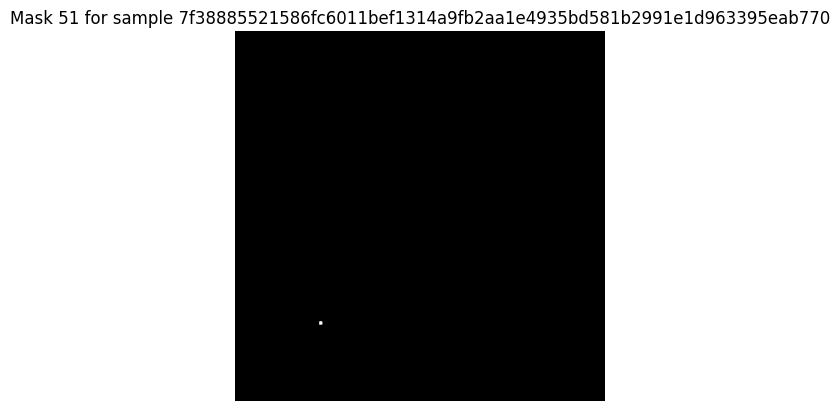

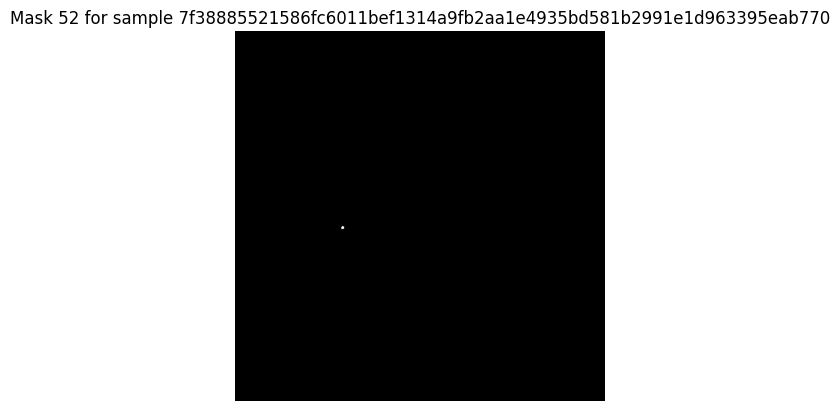

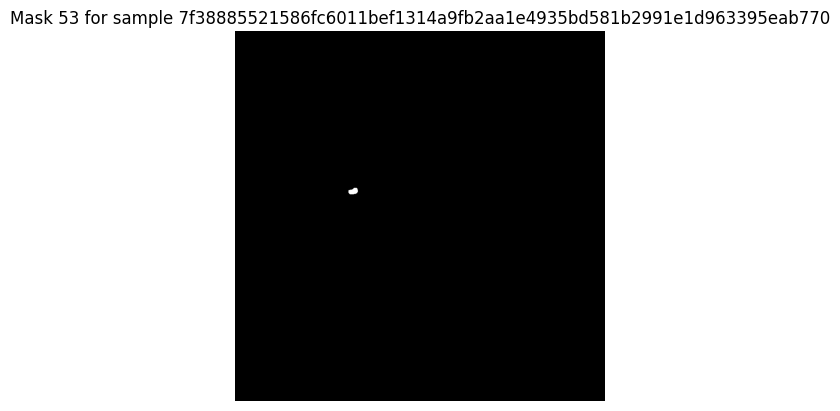

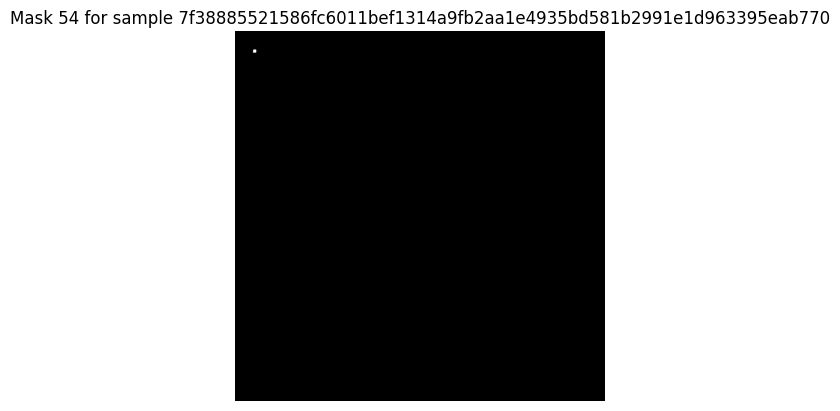

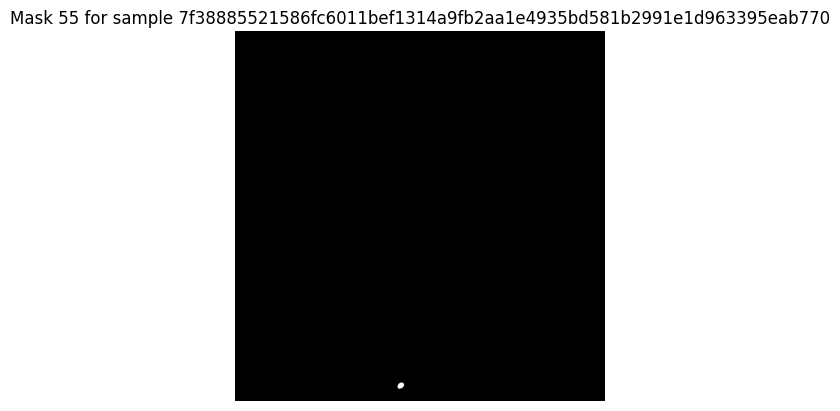

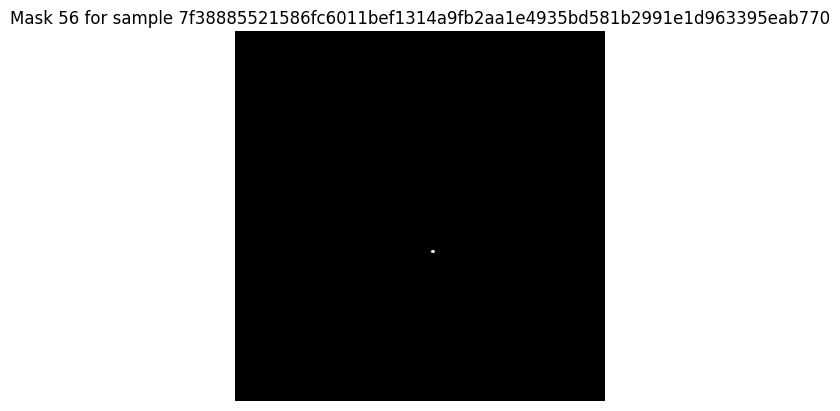

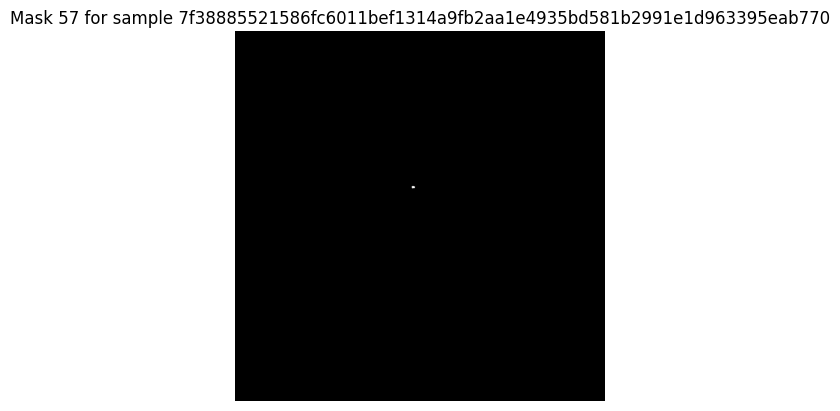

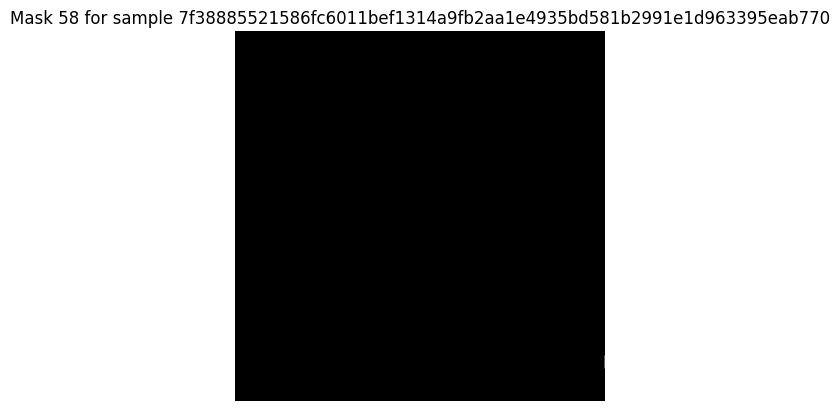

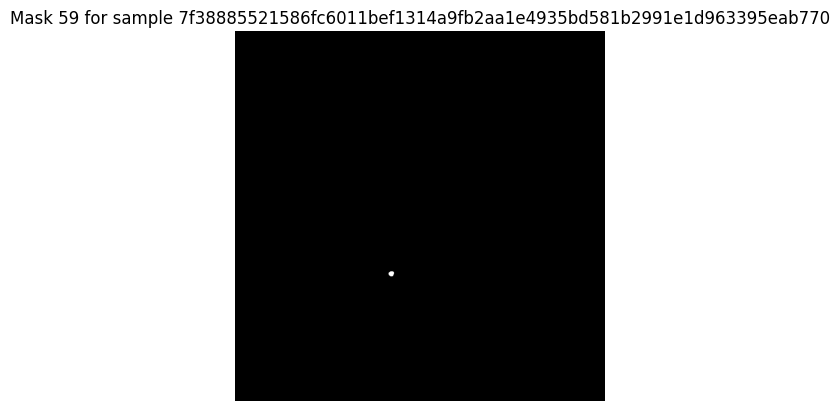

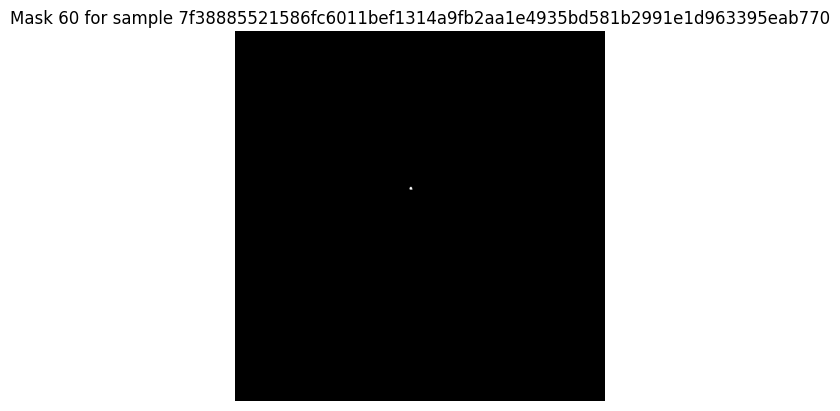

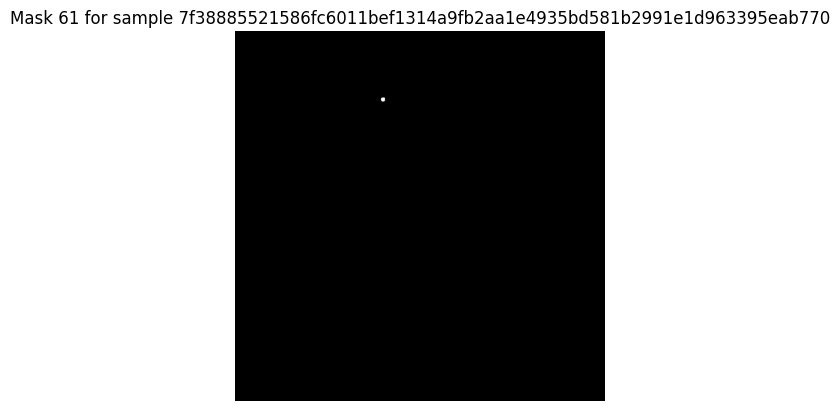

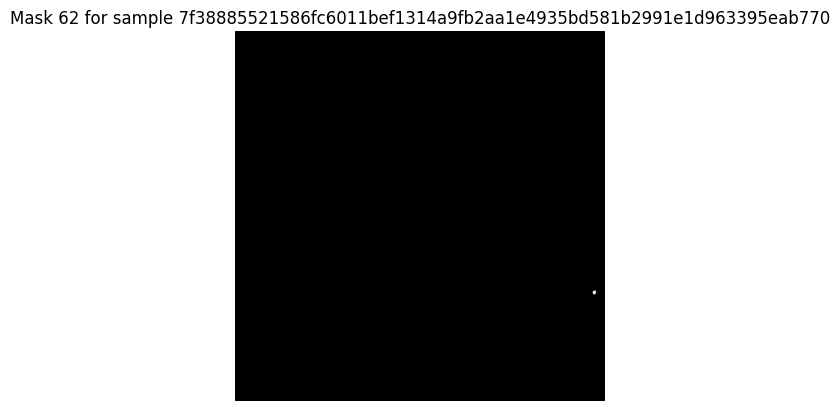

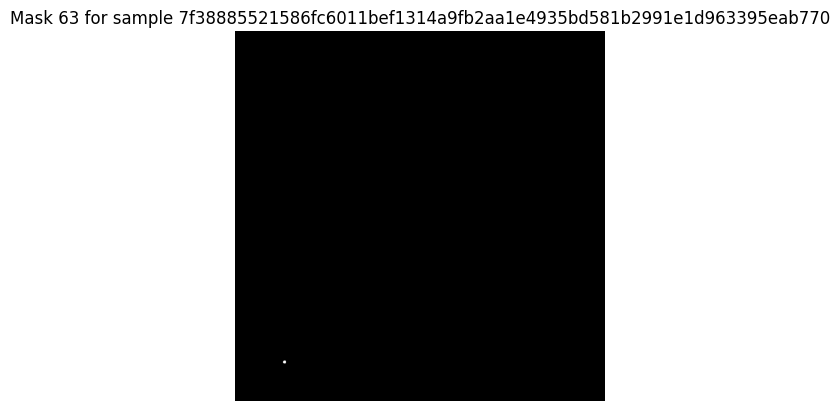

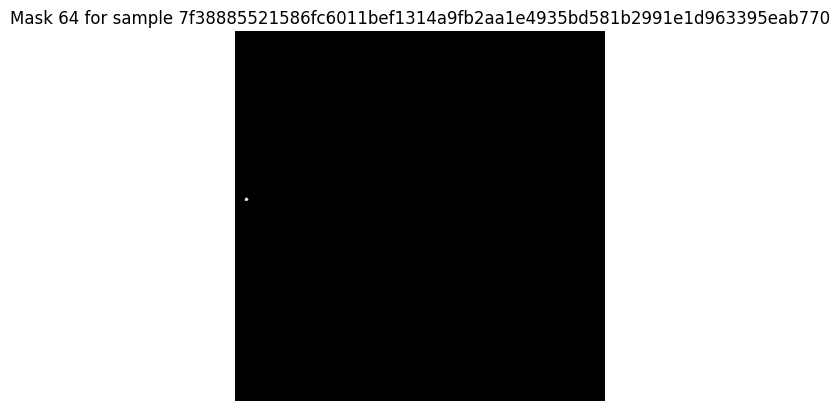

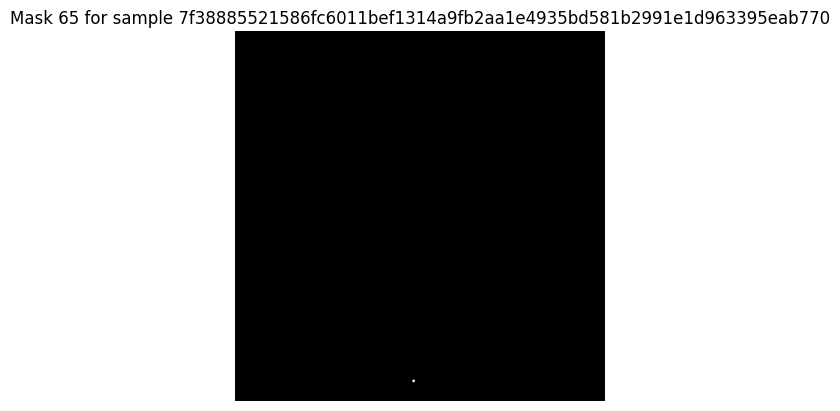

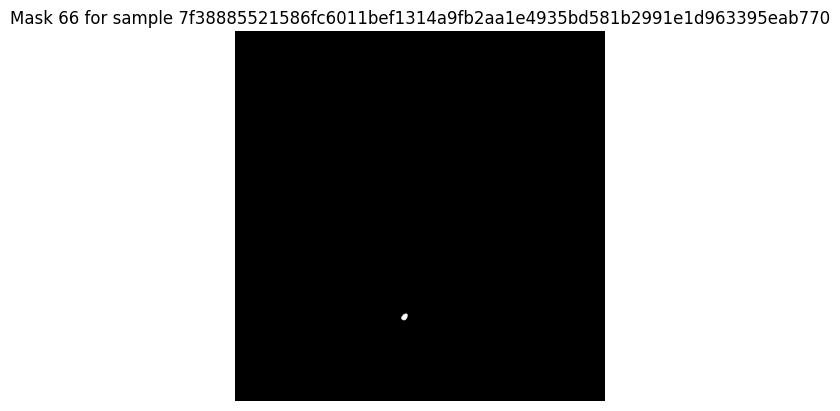

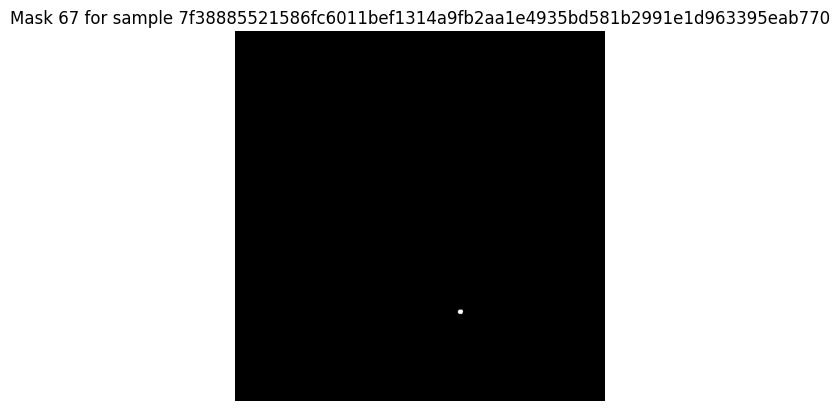

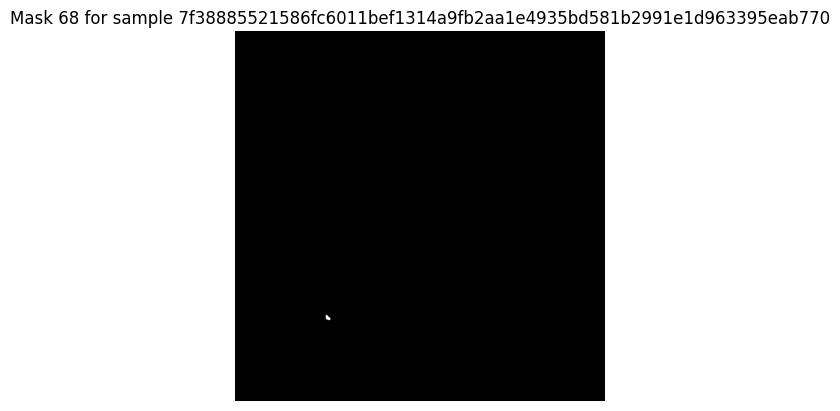

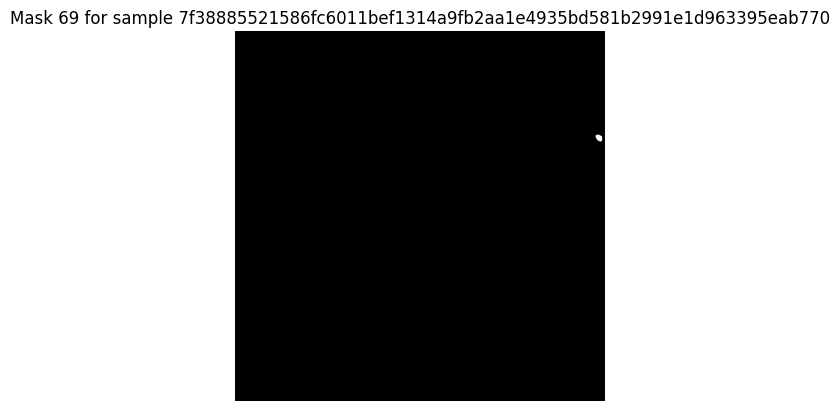

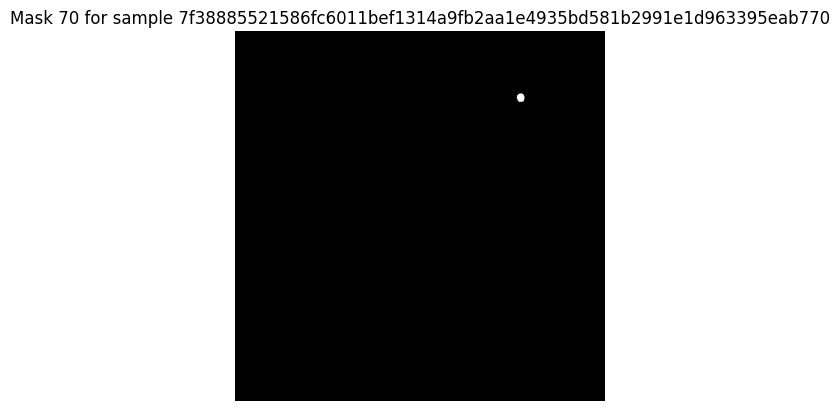

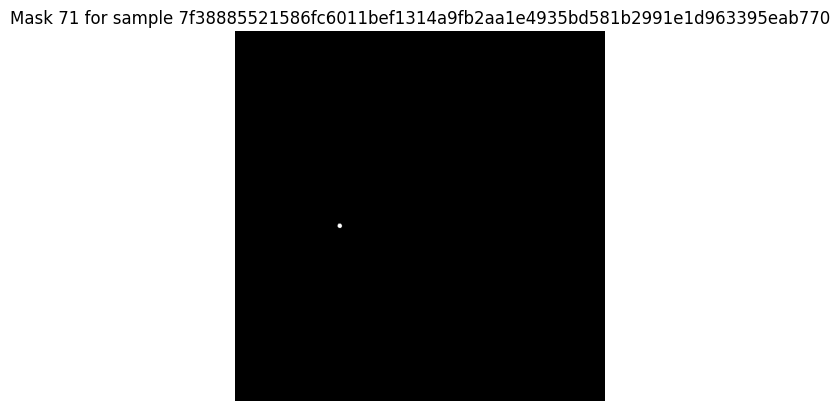

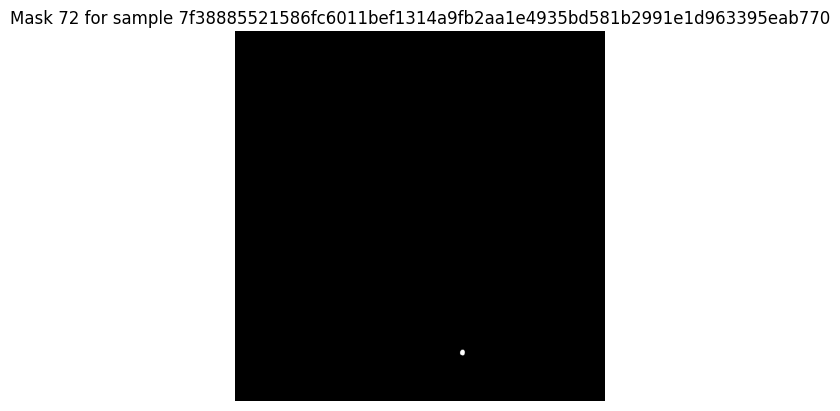

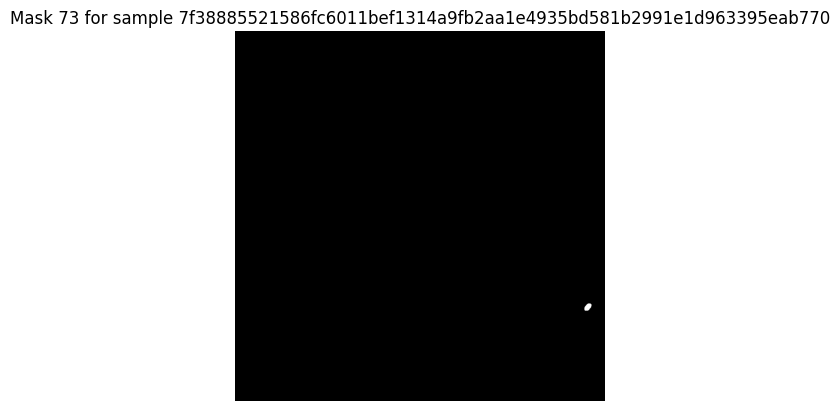

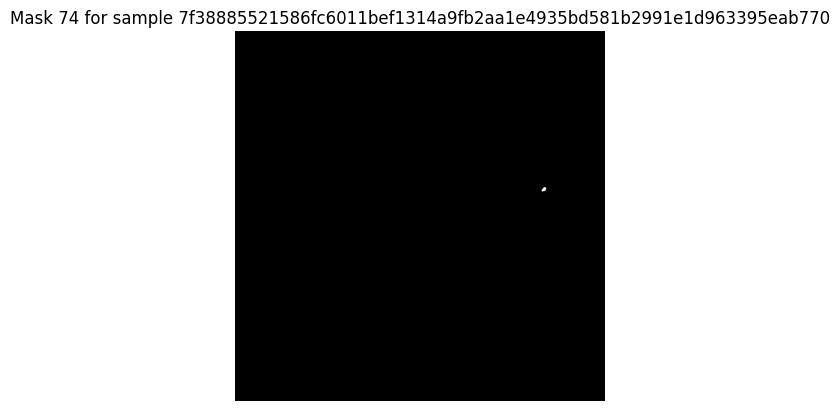

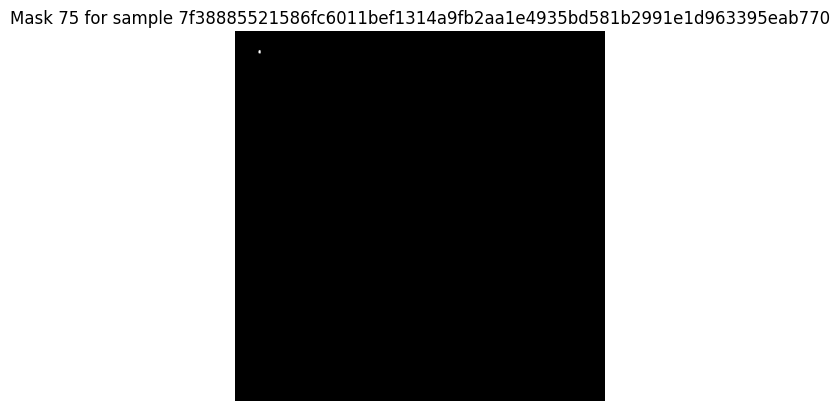

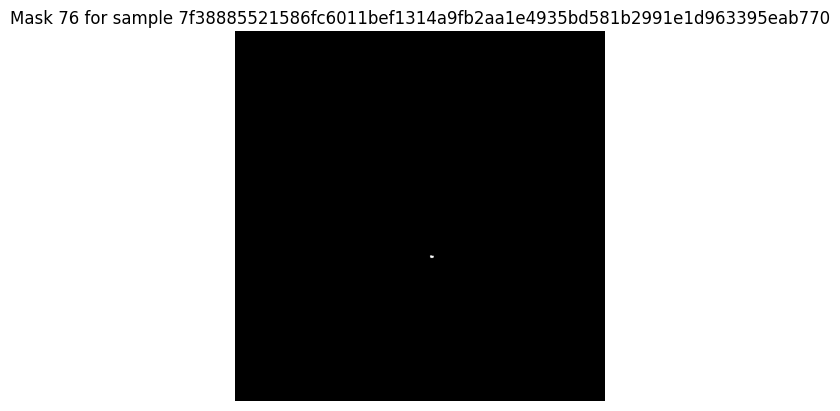

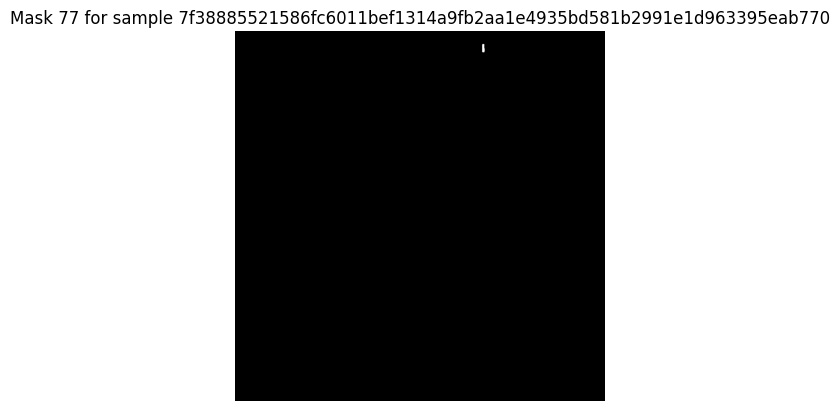

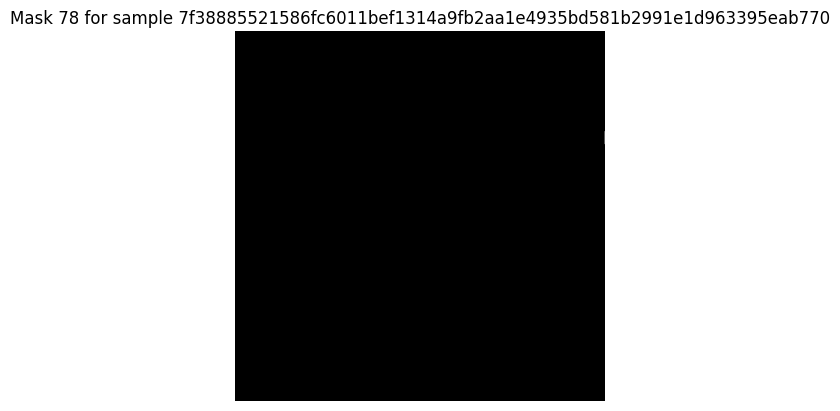

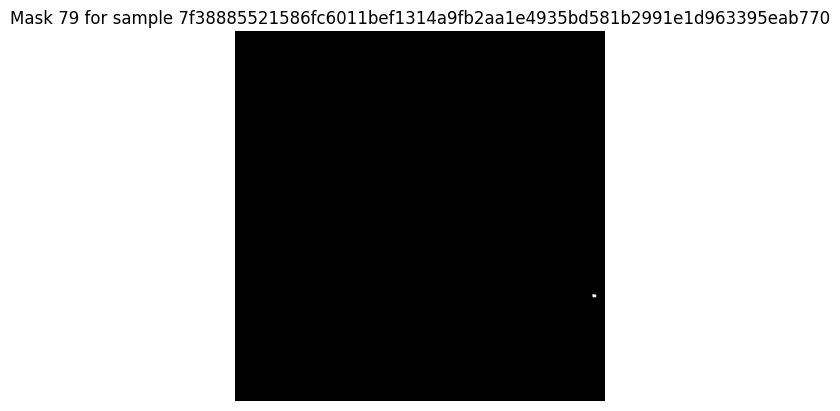

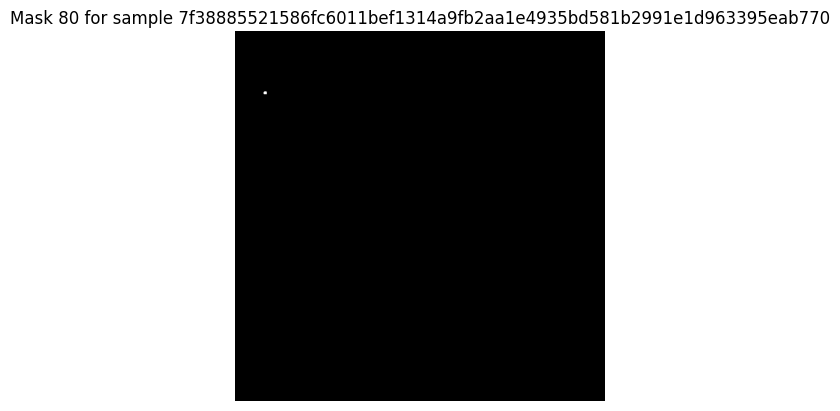

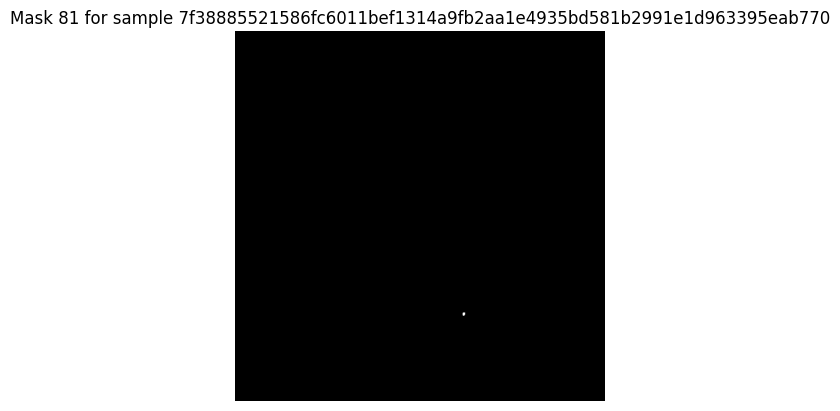

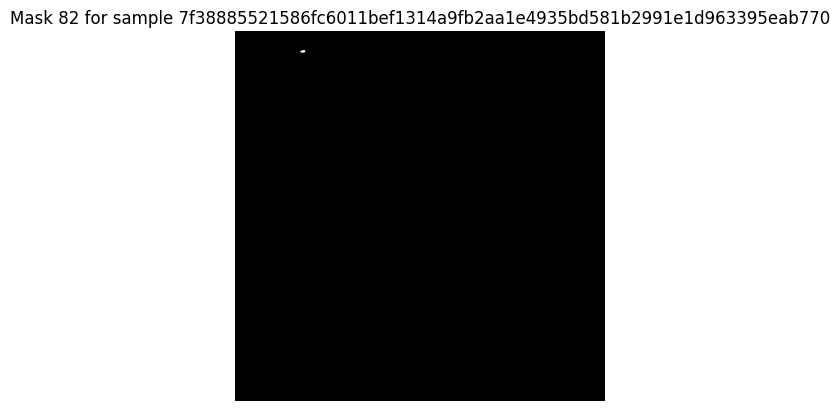

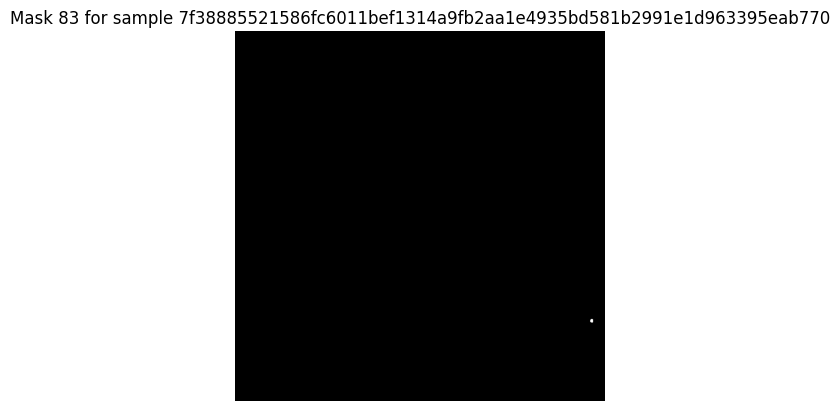

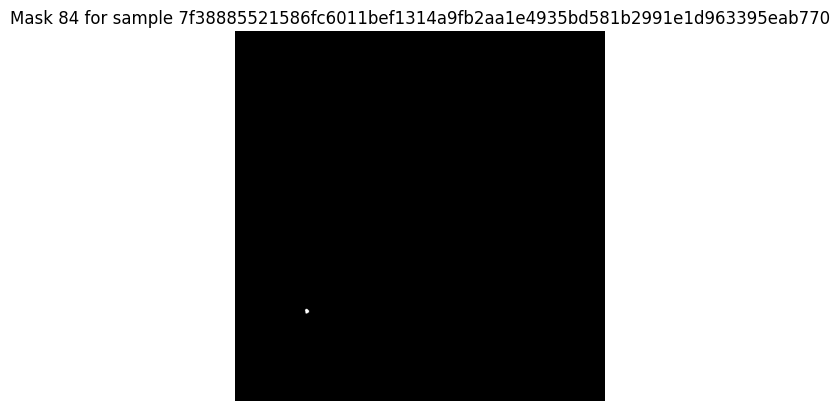

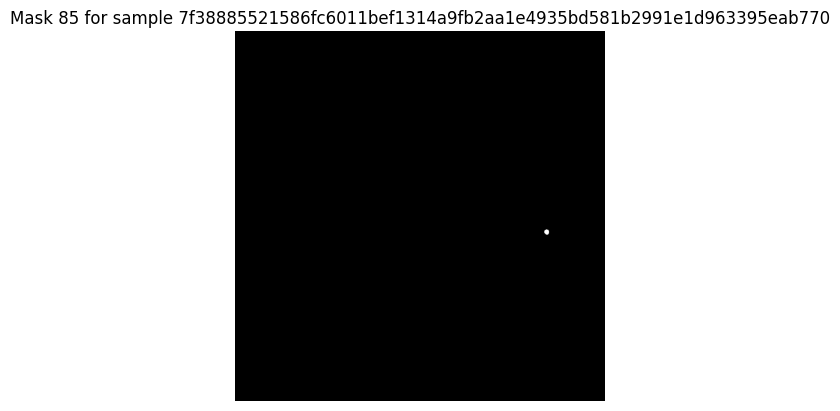

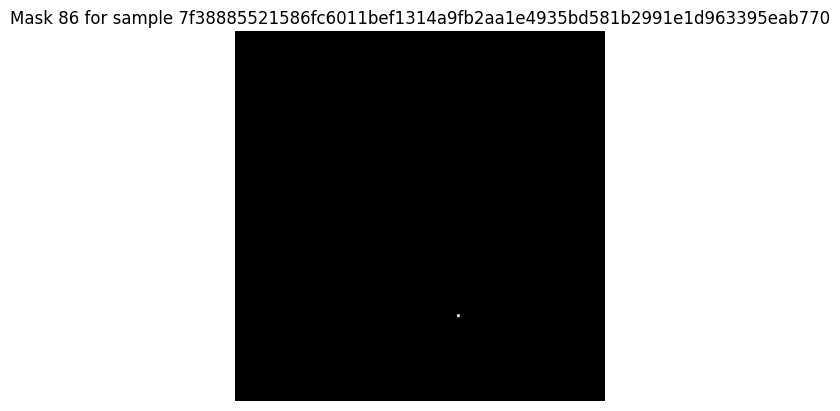

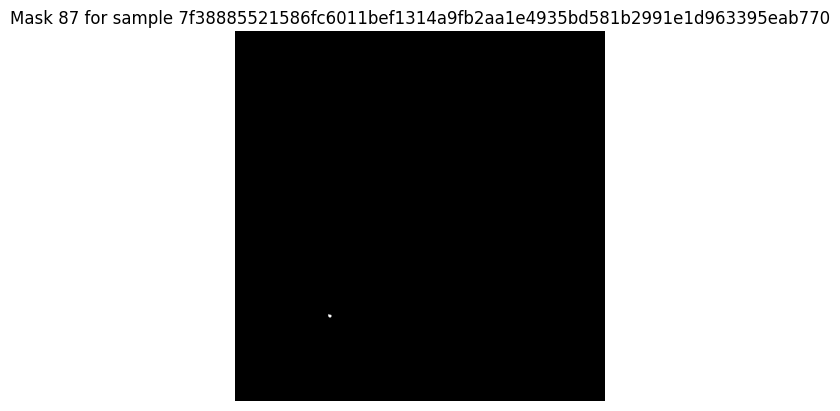

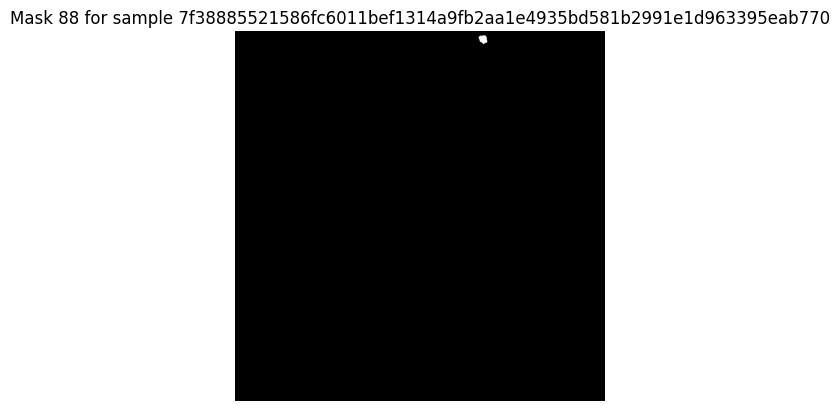

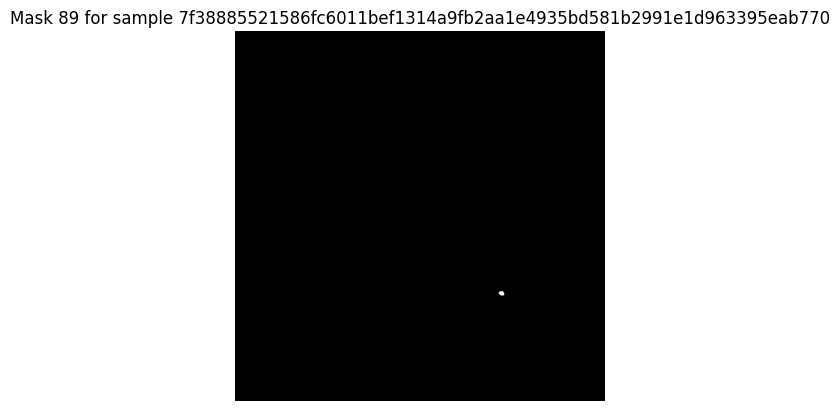

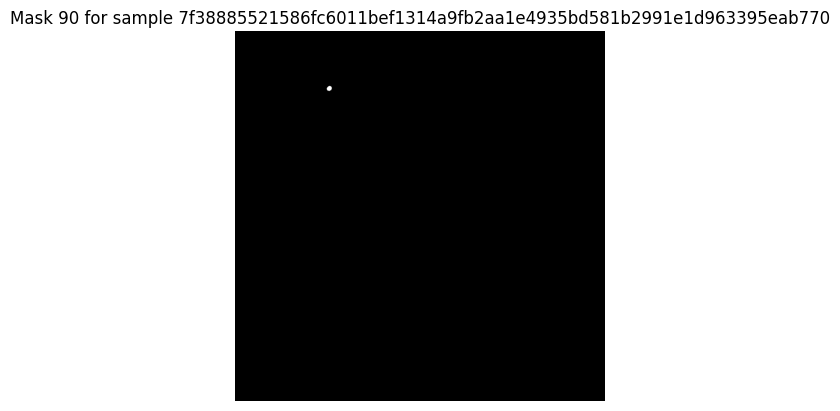

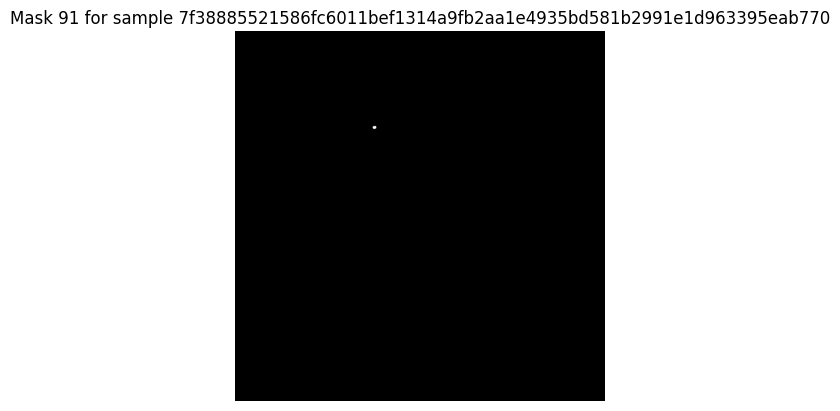

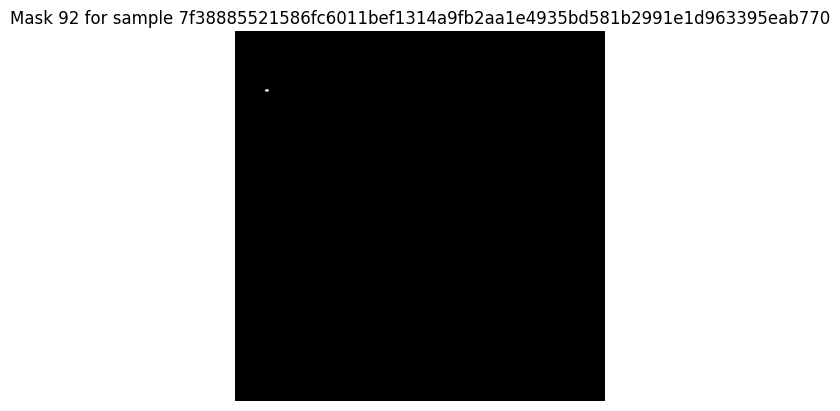

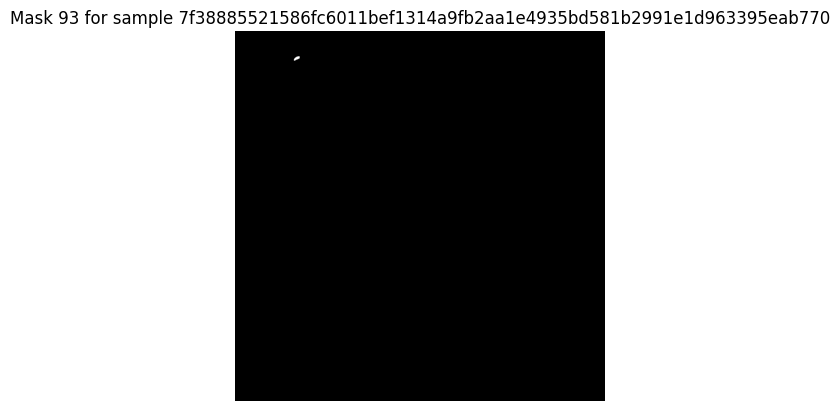

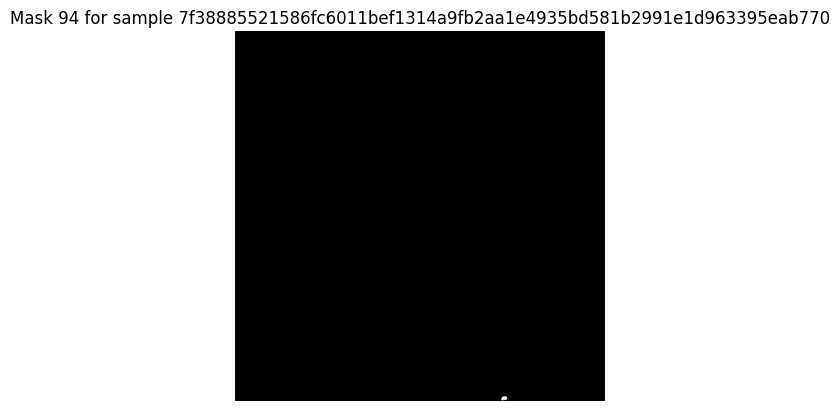

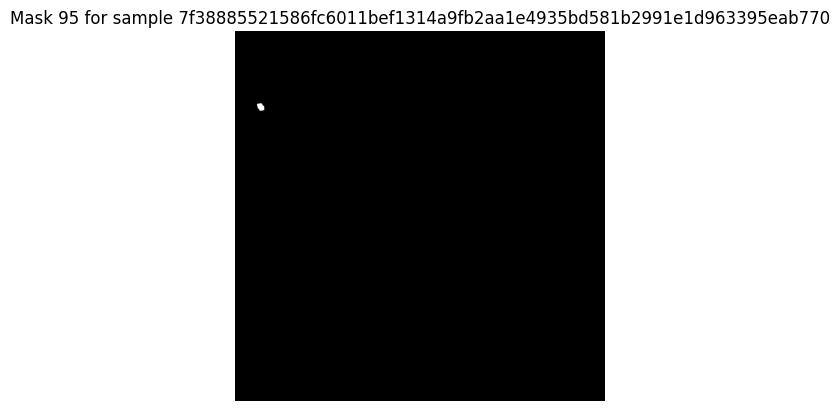

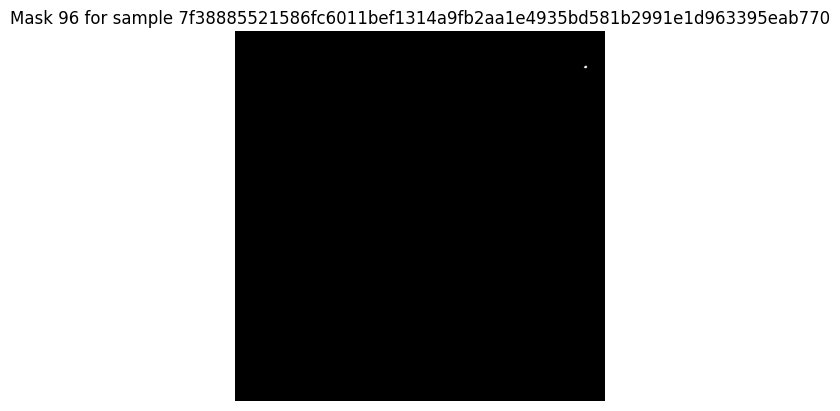

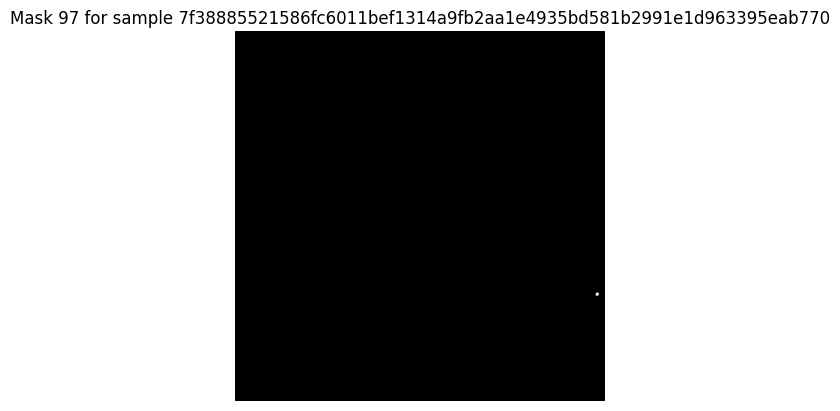

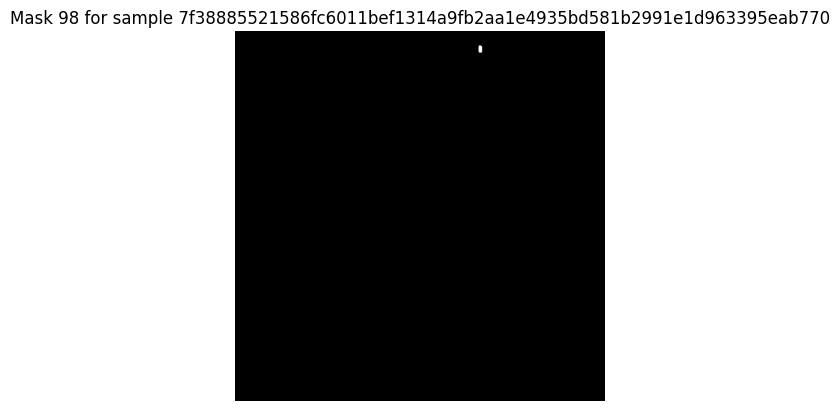

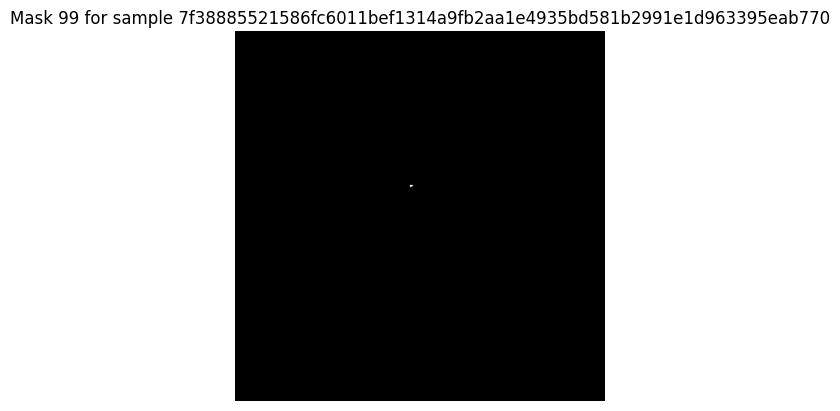

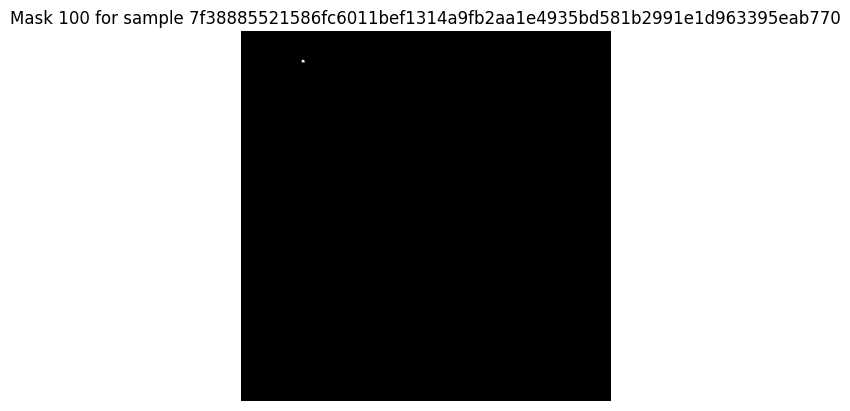

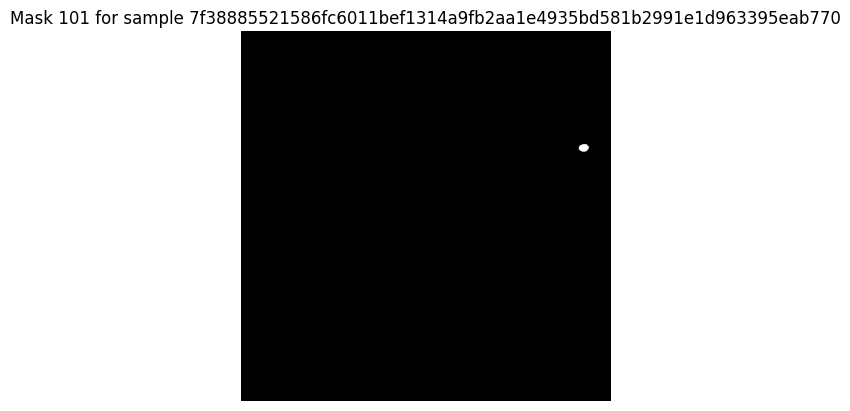

In [44]:
# Example usage:
base_path = '/content/data/toy_data'
images, masks, sample_names = load_data(base_path)

# Access the first sample
first_sample_index = 0
first_sample_name = sample_names[first_sample_index]
first_sample_image = images[first_sample_index]
first_sample_masks = masks[first_sample_index]

# Print the sample name and display the image
print(f'First sample name: {first_sample_name}')
plt.figure()
plt.imshow(first_sample_image)
plt.title(f'Image: {first_sample_name}')
plt.axis('off')
plt.show()

# Display the masks
for i, mask in enumerate(first_sample_masks):
    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.title(f'Mask {i + 1} for sample {first_sample_name}')
    plt.axis('off')
    plt.show()


In [45]:
len(masks[3])

21

In [46]:
def merge_masks(masks):
    """
    Merge masks by adding the values of corresponding pixels.

    Args:
    - masks (list of numpy arrays): List of masks where each mask is represented as a numpy array.

    Returns:
    - merged_mask (numpy array): Merged mask obtained by adding the values of corresponding pixels in the input masks.
    """
    # Initialize the merged mask with zeros
    merged_mask = np.zeros_like(masks[0], dtype=np.uint8)

    # Add the values of corresponding pixels in each mask
    for mask in masks:
        merged_mask += mask

    return merged_mask


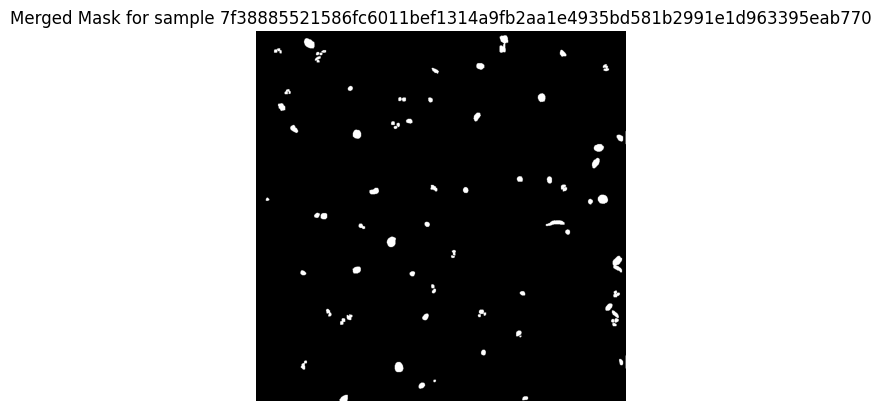

In [47]:
merged_mask = merge_masks(first_sample_masks)

# Display the merged mask
plt.figure()
plt.imshow(merged_mask, cmap='gray')
plt.title(f'Merged Mask for sample {first_sample_name}')
plt.axis('off')
plt.show()

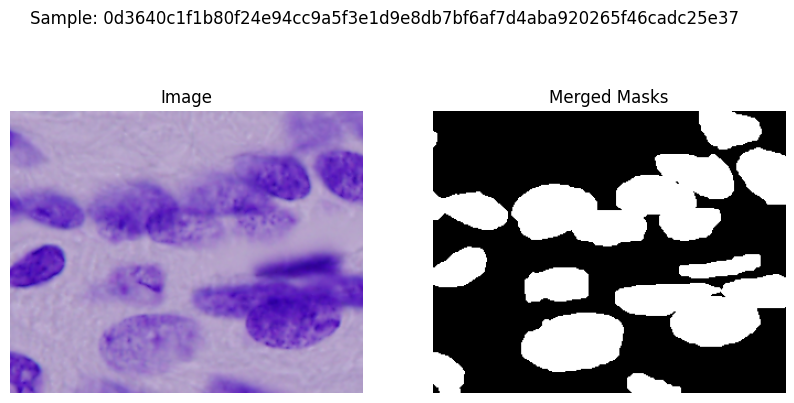

In [49]:
# Choose a sample index to plot
sample_index = 3

# Get sample data
sample_name = sample_names[sample_index]
sample_image = images[sample_index]
sample_masks = masks[sample_index]

# Merge masks
merged_mask = merge_masks(sample_masks)

# Plot the sample with its image and merged masks
plt.figure(figsize=(10, 5))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Image')
plt.axis('off')

# Plot the merged masks
plt.subplot(1, 2, 2)
plt.imshow(merged_mask, cmap='gray')
plt.title('Merged Masks')
plt.axis('off')

plt.suptitle(f'Sample: {sample_name}')
plt.show()